<a href="https://colab.research.google.com/github/Blancavelazquez/Ejercicios1python/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factores de riesgo de enfermedad cardíaca cardiovascular

## Equipo 7:
- Alonso Contreras Guadalupe
- Moreno Abad Angeles Lucero
- Rodríguez Areli
- Velázquez Gil Blanca Andrea



El siguiente ejericio tiene la finalidad aplicar los conocimientos del Módulo 2: Análisis de datos con Python. Además, en cada uno de los apartados está la interpretación de los datos.

A. Descripción del proyecto

B. Aprendizajes aplicados
  1. Estimados de locación y variablidad.
  2. Visualización de datos: distribución.
  3. Gráficas de barras: Frecuenya y porcentaje.  
  4. Correlación y Regresión lineal simple.
  5. Distribuciones muestrales y técnicas de evaluación de modelos.
  6. Visaliación de Datos Avanzada.

C. Continuación del proyecto.



# A. Descripción del proyecto

Las enfermedades cardiovasculares son el conjunto de enfermedades en se afecta el corazón o los vasos sanguíneos. La enfermedad cardiovascular más común es la cardiopatía coronaria (arterias coronarias estrechas u obstruidas), que a veces produce dolor de pecho, infarto de miocardio o accidente cerebrovascular. Otras enfermedades cardiovasculares son la insuficiencia cardíaca congestiva, los problemas del ritmo cardiaco, las cardiopatías congénitas (enfermedades cardiacas desde el nacimiento) y la endocarditis (inflamación de la capa interna del corazón). También se llama cardiopatía.

## Objetivo.
- Analizar y predecir los riesgos de enfermedades cardiovasculares en diferentes grupos en función de sus carcterísticas demográficas, como sexo, altura, peso y tabaquismo.


## Justificación
- Cada año mueren más personas por enfermedades cardiovasculares (ECV) que por cualquier otra causa. Más de tres cuartas partes de las muertes relacionadas con cardiopatías y accidentes cerebrovasculares ocurren en países de ingresos medianos y bajos.
- El riesgo de padecer una enfermedad cardiovascular (ECV) aumenta por una alimentación poco saludable, la cual se caracteriza por un bajo consumo de frutas y verduras y un consumo elevado de sal, azucares y grasas. Una alimentación poco saludable contribuye a la obesidad y el sobrepeso, los cuales a su vez son factores de riesgo para las ECV.
- Las personas que no hacen actividad física suficiente tienen entre un 20% y un 30% más de probabilidades de morir prematuramente que aquellas que hacen actividad física suficiente. Por tanto, la inactividad física es un factor de riesgo clave para la aparición de las ECV, cáncer y diabetes.
- Se estima que la exposición a productos derivado del tabaco es responsable del 10% de todas las muertes ocasionadas por ECV. (OMS, 2023)

# B. Aprendizajes aplicados.

In [ ]:
#Imports:
import pandas as pd
from scipy import stats

## DataFrame seleccionado:

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tecnolochicas - Data Science/Proyecto Equipo 7/heart_data.csv', sep=',')
df_original.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Reduciendo el número de filas del dataframe original:

In [ ]:
#Nombre de las columnas con las que cuenta el dataframe original:
df_original.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
#Columnas clave que definen nuestro estudio:
columnas_clave = ['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc','smoke', 'active', 'cardio']

In [ ]:
#Fraccion en la que se desea dividr el dataframe:
fraccion = 0.1

# Reducir el número de filas de forma proporcional:
df_reducido = df_original.sample(frac=fraccion, random_state=1) # muestra aleatoria del 10% de los datos

#Redefinimos columnas:
df_reducido = df_reducido[columnas_clave]
df_reducido

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
6670,16099,1,153,93.0,1,1,0,1,1
49567,14437,1,157,89.0,1,1,0,1,1
50796,19839,1,165,66.0,1,1,0,1,1
22310,18050,2,176,88.0,2,2,1,1,1
54037,16819,2,165,78.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
56207,21061,1,164,62.0,1,1,0,0,0
12362,18921,1,165,78.0,1,1,0,1,0
8552,21824,1,150,67.0,1,1,0,1,1
60155,23243,2,169,65.0,1,1,0,0,1


In [ ]:
#Reindexando:
df_reducido = df_reducido.reset_index(drop=True)
df_reducido

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,16099,1,153,93.0,1,1,0,1,1
1,14437,1,157,89.0,1,1,0,1,1
2,19839,1,165,66.0,1,1,0,1,1
3,18050,2,176,88.0,2,2,1,1,1
4,16819,2,165,78.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
6995,21061,1,164,62.0,1,1,0,0,0
6996,18921,1,165,78.0,1,1,0,1,0
6997,21824,1,150,67.0,1,1,0,1,1
6998,23243,2,169,65.0,1,1,0,0,1


## Limpieza general del dataframe:

In [ ]:
#Copia del dataframe con el que trabajaremos:
df = df_reducido.copy()

#Dimesiones del dataframe
df.shape

(7000, 9)

In [ ]:
#Tipos de datos en cada columna:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7000 non-null   int64  
 1   gender       7000 non-null   int64  
 2   height       7000 non-null   int64  
 3   weight       7000 non-null   float64
 4   cholesterol  7000 non-null   int64  
 5   gluc         7000 non-null   int64  
 6   smoke        7000 non-null   int64  
 7   active       7000 non-null   int64  
 8   cardio       7000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 492.3 KB


In [ ]:
# Smoke, active y cardio tienen valores binarios de 0 y 1, los cambiaremos a booleanos para que sea más sencillo trabajar con ellos
df['smoke'] = df['smoke'].astype(bool)
df['active'] = df['active'].astype(bool)
df['cardio'] = df['cardio'].astype(bool)

In [ ]:
df.head(5)

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,16099,1,153,93.0,1,1,False,True,True
1,14437,1,157,89.0,1,1,False,True,True
2,19839,1,165,66.0,1,1,False,True,True
3,18050,2,176,88.0,2,2,True,True,True
4,16819,2,165,78.0,1,1,False,False,True


In [ ]:
#Cambiamos el valor de 'age' a una edad real:
df['age'] = (df['age'] / 365).astype(int)
df

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,44,1,153,93.0,1,1,False,True,True
1,39,1,157,89.0,1,1,False,True,True
2,54,1,165,66.0,1,1,False,True,True
3,49,2,176,88.0,2,2,True,True,True
4,46,2,165,78.0,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...
6995,57,1,164,62.0,1,1,False,False,False
6996,51,1,165,78.0,1,1,False,True,False
6997,59,1,150,67.0,1,1,False,True,True
6998,63,2,169,65.0,1,1,False,False,True


In [ ]:
#Comprobando cuántas NaNs tenemos por columna:
df.isna().sum(axis=0)

age            0
gender         0
height         0
weight         0
cholesterol    0
gluc           0
smoke          0
active         0
cardio         0
dtype: int64

In [ ]:
#Cambiamos el valor de 'gender' para definir entre M: Male o F: Female
def convertir_genero(valor):
    if valor == 1:
        return 'M'
    elif valor == 2:
        return 'F'
    else:
        return valor

df['gender'] = df['gender'].apply(convertir_genero)
df.head(5)

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,44,M,153,93.0,1,1,False,True,True
1,39,M,157,89.0,1,1,False,True,True
2,54,M,165,66.0,1,1,False,True,True
3,49,F,176,88.0,2,2,True,True,True
4,46,F,165,78.0,1,1,False,False,True


Las variables:
- Altura (height): representa la estatura de la persona en centímetros.
- Peso (wieght): representa el peso de la persona medido en kilogramos.
- Colesterol (cholesterol): indica el nivel de colesterol total leído como mg/dl en una escala de 0 a 5 unidades. Cada unidad denota un aumento/disminución de 20 mg/dL respectivamente.
- Glucosa (gluc): Nivel de glucosa leído como mmol/l en una escala de 0 a 16 unidades. Cada unidad denota un aumento y una disminución de 1 mmol/L respectivamente.
- Fumador (smoke): Si la persona fuma o no.
- Fisicamente activo (active): si la persona es físicamente activa o no.
- Enfermedad cardiovascular (cardio): si la persona padece enfermedades cardiovasculares o no.

## Relevancia de cada columna a trabajar:

- _Edad_: la edad es un factor fundamental en la salud cardiovascular. La incidencia de enfermedades cardíacas tiende a aumentar con la edad.
- _Género_: las diferencias de género pueden influir en la predisposición a enfermedades cardíacas, es esencial entender cómo se relaciona este con los riesgos cardiovasculares.
- _Altura_ y _peso_: la relación entre estatura, peso y riesgos cardiovasculares puede ofrecer información sobre la composición corporal y la obesidad, que son factores importantes en la salud del corazón.
- _Niveles de colesterol y glucosa_: estos indicadores bioquímicos son críticos para evaluar la salud cardiovascular. Altos niveles de colesterol y glucosa están asociados con un mayor riesgo de enfermedades cardíacas.
- _Cigarro:_ el hábito de fumar es un factor de riesgo bien conocido para enfermedades cardiovasculares.
- _Actividad física_: evaluar la presencia o ausencia de actividad física proporciona información importante para entender el estilo de vida y sus efectos en la salud del corazón.
- _Enfermedades cardiovasculares_: esta categoría es la variable objetivo, y comprender su relación con otras características permite construir modelos predictivos.

# 1. Estimados de locación y variabilidad:





Promedio:

In [ ]:
#Edad promedio:
age_mean = df['age'].mean().astype(int)
print(f'- La edad promedio entre el número de personas registradas es de {age_mean} años.')

#Altura promedio:
height_mean = df['height'].mean().astype(int)
print(f'- La altura promedio entre el número de personas registradas es de {height_mean} centímetros.')

#Peso promedio:
weight_mean = df['weight'].mean()
print(f'- El peso promedio entre el número de personas registradas es de {round(weight_mean, 2)} kilogramos.')

#Nivel de colesterol promedio:
cholesterol_mean = df['cholesterol'].mean().astype(int)
print(f'- El nivel de aumento de colesterol promedio entre el número de personas registradas es de {cholesterol_mean} mg/dL de 20 mg/dL por unidad.')

#Nivel de glucosa promedio:
gluc_mean = df['gluc'].mean().astype(int)
print(f'- El nivel de aumento de glucosa promedio entre el número de personas registradas es de {gluc_mean} mmol/L por unidad.')


- La edad promedio entre el número de personas registradas es de 52 años.
- La altura promedio entre el número de personas registradas es de 164 centímetros.
- El peso promedio entre el número de personas registradas es de 73.98 kilogramos.
- El nivel de aumento de colesterol promedio entre el número de personas registradas es de 1 mg/dL de 20 mg/dL por unidad.
- El nivel de aumento de glucosa promedio entre el número de personas registradas es de 1 mmol/L por unidad.


Mediana:

In [ ]:
#Mediana de Edad:
age_median = df['age'].median().astype(int)
print(f'- La mediana de edades entre el número de personas registradas es de {age_median} años.')

#Mediana de Altura:
height_median = df['height'].median().astype(int)
print(f'- La mediana de alturas entre el número de personas registradas es de {height_median} centímetros.')

#Mediana de Peso:
weight_median = df['weight'].median()
print(f'- La mediana de pesos entre el número de personas registradas es de {weight_median} kilogramos.')

#Mediana de Nivel de colesterol:
cholesterol_median = df['cholesterol'].median().astype(int)
print(f'- La mediana del nivel de aumento de colesterol entre el número de personas registradas es de {cholesterol_median} mg/dL de 20 mg/dL por unidad.')

#Mediana de Nivel de glucosa:
gluc_median = df['gluc'].median().astype(int)
print(f'- La mediana del nivel de aumento de glucosa entre el número de personas registradas es de {gluc_median} mmol/L por unidad.')


- La mediana de edades entre el número de personas registradas es de 53 años.
- La mediana de alturas entre el número de personas registradas es de 165 centímetros.
- La mediana de pesos entre el número de personas registradas es de 72.0 kilogramos.
- La mediana del nivel de aumento de colesterol entre el número de personas registradas es de 1 mg/dL de 20 mg/dL por unidad.
- La mediana del nivel de aumento de glucosa entre el número de personas registradas es de 1 mmol/L por unidad.


Media Truncada:

In [ ]:
# Porcentaje de valores a truncar (10% en cada extremo)
percent = 0.1;

#Media Truncada de la columna Edad:
trimmed_mean_age = stats.trim_mean(df['age'], percent)
print(f'- La mediana recortada de las edades resgistradas es de {trimmed_mean_age:,.3f} años.')

#Media Truncada de la columna Altura:
trimmed_mean_height = stats.trim_mean(df['height'], percent)
print(f'- La mediana recortada de las alturas resgistradas es de {trimmed_mean_height:,.3f} centímetros.')

#Media Truncada de la columna Peso:
trimmed_mean_weight = stats.trim_mean(df['weight'], percent)
print(f'- La mediana recortada de los pesos resgistrados es de {trimmed_mean_weight:,.3f} kilogramos.')

#Media Truncada de la columna Nivel de colesterol:
trimmed_mean_cholesterol = stats.trim_mean(df['cholesterol'], percent)
print(f'- La mediana recortada de los niveles de aumeto de colesterol resgistrados es de {trimmed_mean_cholesterol:,.3f} mg/dL de 20 mg/dL por unidad.')

#Media Truncada de la columna Nivel de glucosa:
trimmed_mean_gluc = stats.trim_mean(df['gluc'], percent)
print(f'- La mediana recortada de los niveles de aumeto de glucosa resgistrados es de {trimmed_mean_gluc:,.3f} mmol/L por unidad.')

- La mediana recortada de las edades resgistradas es de 53.030 años.
- La mediana recortada de las alturas resgistradas es de 164.238 centímetros.
- La mediana recortada de los pesos resgistrados es de 72.808 kilogramos.
- La mediana recortada de los niveles de aumeto de colesterol resgistrados es de 1.211 mg/dL de 20 mg/dL por unidad.
- La mediana recortada de los niveles de aumeto de glucosa resgistrados es de 1.060 mmol/L por unidad.


Desviación estándar:

In [ ]:
#Desviación estandar de la columna Edad:
standar_deviation_age=df['age'].std()
print(f'- La desviación estandar del grupo edades es de {standar_deviation_age:,.3f} años.')

#Desviación estandar de la columna Altura:
standar_deviation_height=df['height'].std()
print(f'- La desviación estandar del grupo alturas es de {standar_deviation_height:,.3f} centímetros.')

#Desviación estandar de la columna Peso:
standar_deviation_weight=df['weight'].std()
print(f'- La desviación estandar del grupo pesos es de {standar_deviation_weight:,.3f} kilogramos.')

#Desviación estandar de la columna Nivel de colesterol:
standar_deviation_cholesterol=df['cholesterol'].std()
print(f'- La desviación estandar del grupo nivel de colesterol es de {standar_deviation_cholesterol:,.3f} mg/dL de 20 mg/dL por unidad.')

#Desviación estandar de la columna Nivel de glucosa:
standar_deviation_gluc=df['gluc'].std()
print(f'- La desviación estandar del grupo nivel de glucosa es de {standar_deviation_gluc:,.3f} mmol/L por unidad.')

- La desviación estandar del grupo edades es de 6.795 años.
- La desviación estandar del grupo alturas es de 8.480 centímetros.
- La desviación estandar del grupo pesos es de 14.313 kilogramos.
- La desviación estandar del grupo nivel de colesterol es de 0.686 mg/dL de 20 mg/dL por unidad.
- La desviación estandar del grupo nivel de glucosa es de 0.562 mmol/L por unidad.


Rango:

In [ ]:
#Rango de la columna Edad:
age_range = (df['age'].max() - df['age'].min()).astype(int)
print(f'1. Rango del grupo de edades:')
print(f'  - Valor mínimo registrado: {df["age"].min()} años')
print(f'  - Rango: {age_range}')
print(f'  - Valor máximo registrado: {df["age"].max()} años')
print("\n")

#Rango de la columna Altura:
height_range = (df['height'].max() - df['height'].min()).astype(int)
print(f'2. Rango del grupo de alturas:')
print(f'  - Valor mínimo registrado: {df["height"].min()} centímetros')
print(f'  - Rango: {height_range}')
print(f'  - Valor máximo registrado: {df["height"].max()} centímetros')
print("\n")

#Rango de la columna Peso:
weight_range = (df['weight'].max() - df['weight'].min()).astype(int)
print(f'3. Rango del grupo de pesos:')
print(f'  - Valor mínimo registrado: {df["weight"].min()} kilogramos')
print(f'  - Rango: {weight_range}')
print(f'  - Valor máximo registrado: {df["weight"].max()} kilogramos')
print("\n")

#Rango de la columna Nivel de colesterol:
cholesterol_range = (df['cholesterol'].max() - df['cholesterol'].min()).astype(int)
print(f'4. Rango del grupo de nivel de colesterol:')
print(f'  - Valor mínimo registrado: {df["cholesterol"].min()} de 20 mg/dL por unidad.')
print(f'  - Rango: {cholesterol_range}')
print(f'  - Valor máximo registrado: {df["cholesterol"].max()} de 20 mg/dL por unidad.')
print("\n")

#Rango de la columna Nivel de glucosa:
gluc_range = (df['gluc'].max() - df['gluc'].min()).astype(int)
print(f'5. Rango del grupo de nivel de glucosa:')
print(f'  - Valor mínimo registrado: {df["gluc"].min()} mmol/L por unidad.')
print(f'  - Rango: {gluc_range}')
print(f'  - Valor máximo registrado: {df["gluc"].max()} mmol/L por unidad.')
print("\n")

1. Rango del grupo de edades:
  - Valor mínimo registrado: 39 años
  - Rango: 25
  - Valor máximo registrado: 64 años


2. Rango del grupo de alturas:
  - Valor mínimo registrado: 55 centímetros
  - Rango: 195
  - Valor máximo registrado: 250 centímetros


3. Rango del grupo de pesos:
  - Valor mínimo registrado: 10.0 kilogramos
  - Rango: 154
  - Valor máximo registrado: 164.0 kilogramos


4. Rango del grupo de nivel de colesterol:
  - Valor mínimo registrado: 1 de 20 mg/dL por unidad.
  - Rango: 2
  - Valor máximo registrado: 3 de 20 mg/dL por unidad.


5. Rango del grupo de nivel de glucosa:
  - Valor mínimo registrado: 1 mmol/L por unidad.
  - Rango: 2
  - Valor máximo registrado: 3 mmol/L por unidad.




Percentil 25 y 75:

In [ ]:
#Percentiles del grupo Edades:
print(f'1. Percentiles del grupo de edades (años):')
print(f'  - Valor mínimo: {df["age"].min()}')
print(f'  - Percentil 10: {(df["age"].quantile(0.1)).astype(int)}')
print(f'  - Percentil 25: {(df["age"].quantile(0.25)).astype(int)}')
print(f'  - Percentil 50: {(df["age"].median()).astype(int)}')
print(f'  - Percentil 75: {(df["age"].quantile(0.75)).astype(int)}')
print(f'  - Percentil 90: {(df["age"].quantile(0.9)).astype(int)}')
print(f'  - Valor máximo: {df["age"].max()}')
print("\n")

#Percentiles del grupo Alturas:
print(f'2. Percentiles del grupo de alturas (centímetros):')
print(f'  - Valor mínimo: {df["height"].min()}')
print(f'  - Percentil 10: {(df["height"].quantile(0.1)).astype(int)}')
print(f'  - Percentil 25: {(df["height"].quantile(0.25)).astype(int)}')
print(f'  - Percentil 50: {(df["height"].median()).astype(int)}')
print(f'  - Percentil 75: {(df["height"].quantile(0.75)).astype(int)}')
print(f'  - Percentil 90: {(df["height"].quantile(0.9)).astype(int)}')
print(f'  - Valor máximo: {df["height"].max()}')
print("\n")

#Percentiles del grupo Pesos:
print(f'3. Percentiles del grupo de pesos (kilogramos):')
print(f'  - Valor mínimo: {df["weight"].min()}')
print(f'  - Percentil 10: {df["weight"].quantile(0.1)}')
print(f'  - Percentil 25: {df["weight"].quantile(0.25)}')
print(f'  - Percentil 50: {df["weight"].median()}')
print(f'  - Percentil 75: {df["weight"].quantile(0.75)}')
print(f'  - Percentil 90: {df["weight"].quantile(0.9)}')
print(f'  - Valor máximo: {df["weight"].max()}')
print("\n")

#Percentiles del grupo Nivel de colesterol:
print(f'4. Percentiles del grupo de nivel de colesterol (20 mg/dL por unidad):')
print(f'  - Valor mínimo: {(df["cholesterol"].min()).astype(float)}')
print(f'  - Percentil 10: {df["cholesterol"].quantile(0.1)}')
print(f'  - Percentil 25: {df["cholesterol"].quantile(0.25)}')
print(f'  - Percentil 50: {df["cholesterol"].median()}')
print(f'  - Percentil 75: {df["cholesterol"].quantile(0.75)}')
print(f'  - Percentil 90: {df["cholesterol"].quantile(0.9)}')
print(f'  - Valor máximo: {(df["cholesterol"].max()).astype(float)}')
print("\n")

#Percentiles del grupo Nivel de glucosa:
print(f'5. Percentiles del grupo de nivel de glucosa (mmol/L por unidad):')
print(f'  - Valor mínimo: {(df["gluc"].min()).astype(float)}')
print(f'  - Percentil 10: {df["gluc"].quantile(0.1)}')
print(f'  - Percentil 25: {df["gluc"].quantile(0.25)}')
print(f'  - Percentil 50: {df["gluc"].median()}')
print(f'  - Percentil 75: {df["gluc"].quantile(0.75)}')
print(f'  - Percentil 90: {df["gluc"].quantile(0.9)}')
print(f'  - Valor máximo: {(df["gluc"].max()).astype(float)}')
print("\n")

1. Percentiles del grupo de edades (años):
  - Valor mínimo: 39
  - Percentil 10: 43
  - Percentil 25: 48
  - Percentil 50: 53
  - Percentil 75: 58
  - Percentil 90: 62
  - Valor máximo: 64


2. Percentiles del grupo de alturas (centímetros):
  - Valor mínimo: 55
  - Percentil 10: 154
  - Percentil 25: 159
  - Percentil 50: 165
  - Percentil 75: 170
  - Percentil 90: 175
  - Valor máximo: 250


3. Percentiles del grupo de pesos (kilogramos):
  - Valor mínimo: 10.0
  - Percentil 10: 59.0
  - Percentil 25: 65.0
  - Percentil 50: 72.0
  - Percentil 75: 81.0
  - Percentil 90: 93.0
  - Valor máximo: 164.0


4. Percentiles del grupo de nivel de colesterol (20 mg/dL por unidad):
  - Valor mínimo: 1.0
  - Percentil 10: 1.0
  - Percentil 25: 1.0
  - Percentil 50: 1.0
  - Percentil 75: 2.0
  - Percentil 90: 3.0
  - Valor máximo: 3.0


5. Percentiles del grupo de nivel de glucosa (mmol/L por unidad):
  - Valor mínimo: 1.0
  - Percentil 10: 1.0
  - Percentil 25: 1.0
  - Percentil 50: 1.0
  - Perce

Rango intercuartil:

In [ ]:
print(f'Rango intercuartil de los grupos:')

#Rango intercuartil del grupo Edades:
interquartile_range_age = df["age"].quantile(0.75) - df["age"].quantile(0.25)
print(f'  - Edades: {interquartile_range_age} años')

#Rango intercuartil del grupo Alturas:
interquartile_range_height = df["height"].quantile(0.75) - df["height"].quantile(0.25)
print(f'  - Alturas: {interquartile_range_height} centímetros')

#Rango intercuartil del grupo Pesos:
interquartile_range_weight = df["weight"].quantile(0.75) - df["weight"].quantile(0.25)
print(f'  - Pesos: {interquartile_range_weight} kilogramos')

#Rango intercuartil del grupo Nivel de colesterol:
interquartile_range_cholesterol = df["cholesterol"].quantile(0.75) - df["cholesterol"].quantile(0.25)
print(f'  - Nivel de colesterol: {interquartile_range_cholesterol} de 20 mg/dL por unidad')

#Rango intercuartil del grupo Nivel de glucosa:
interquartile_range_gluc = df["gluc"].quantile(0.75) - df["gluc"].quantile(0.25)
print(f'  - Nivel de glucosa: {interquartile_range_gluc} de 20 mg/dL por unidad')

Rango intercuartil de los grupos:
  - Edades: 10.0 años
  - Alturas: 11.0 centímetros
  - Pesos: 16.0 kilogramos
  - Nivel de colesterol: 1.0 de 20 mg/dL por unidad
  - Nivel de glucosa: 0.0 de 20 mg/dL por unidad


# 2. Visualización de datos: distribución.

Boxplots de las variables a estudiar.

In [ ]:
df.head()

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,44,M,153,93.0,1,1,False,True,True
1,39,M,157,89.0,1,1,False,True,True
2,54,M,165,66.0,1,1,False,True,True
3,49,F,176,88.0,2,2,True,True,True
4,46,F,165,78.0,1,1,False,False,True


In [ ]:
# Recordando las variables de interés
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7000 non-null   int64  
 1   gender       7000 non-null   object 
 2   height       7000 non-null   int64  
 3   weight       7000 non-null   float64
 4   cholesterol  7000 non-null   int64  
 5   gluc         7000 non-null   int64  
 6   smoke        7000 non-null   bool   
 7   active       7000 non-null   bool   
 8   cardio       7000 non-null   bool   
dtypes: bool(3), float64(1), int64(4), object(1)
memory usage: 348.8+ KB


In [ ]:
# Importaciones
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Edades

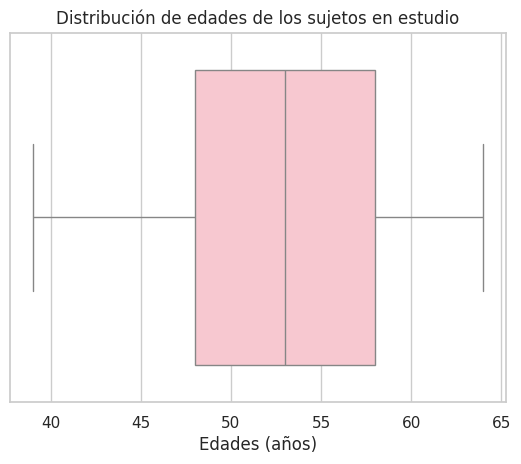

In [ ]:
# Boxplot de la distribución de las edades de los sujetos en estudio
sns.set(style = "whitegrid")
sns.boxplot(x = df['age'], color = "pink")
plt.title("Distribución de edades de los sujetos en estudio")
plt.xlabel("Edades (años)")
# Mostrar boxplot
plt.show()

Como observamos en el boxplot anterior, la mayor proporción de individuos estudiados tienen entre 45 y 60 años, sin embargo, existe una pequeña proporción de individuos con edades de entre 40 y 45, asi como de 60 a 65.

 Alturas

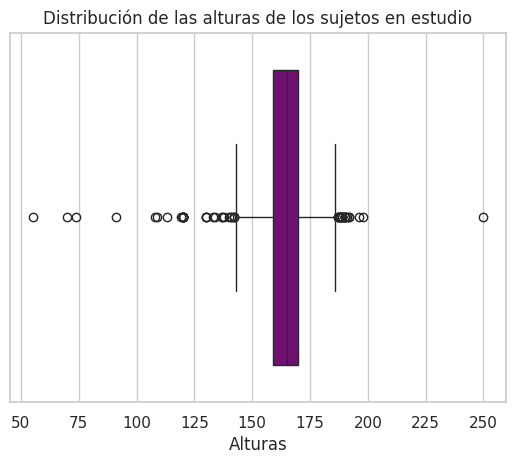

In [ ]:
# Boxplot de la distribución de las alturas de los sujetos en estudio
sns.set(style = "whitegrid")
sns.boxplot(x = df['height'], color = "purple")
plt.title("Distribución de las alturas de los sujetos en estudio")
plt.xlabel("Alturas")
# Mostrar boxplot
plt.show()

Como observamos, existen muchos valores atipicos que afectan la visualización de nuestro gráfico, por lo tanto, vamos a limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite

In [ ]:
iqr = df['height'].quantile(0.75) - df['height'].quantile(0.25)
filtro_inferior = df['height'] > df['height'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['height'] < df['height'].quantile(0.75) + (iqr * 1.5)
df_height_filtrado =df[filtro_inferior & filtro_superior]

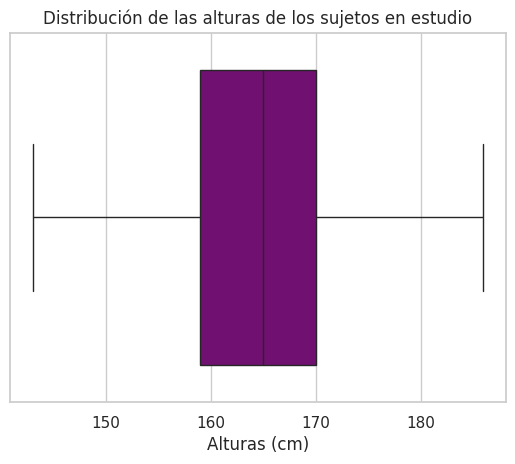

In [ ]:
# Crear gráfilos con valores atipicos filtrados
sns.boxplot(x = df_height_filtrado['height'], color = "purple")
plt.title("Distribución de las alturas de los sujetos en estudio")
plt.xlabel("Alturas (cm)")

# Mostrar boxplot
plt.show()

Una vez filtrado los valores atipicos, podemos observar que la mayor proporción de sujetos en estudio tienen ulturas de entre 160 y 170 cm, sin embargo, la distribución se extiende hasta 140 cm y >190 cm.

---



In [ ]:
#Mediana de Altura:
height_median_filtrado = df_height_filtrado['height'].median().astype(int)
print(f'- La mediana de alturas después de filtrar los datos atipicos es de {height_median_filtrado} centímetros.')


- La mediana de alturas después de filtrar los datos atipicos es de 165 centímetros.


In [ ]:
#Media:
height_mean_filtrado = df_height_filtrado['height'].mean().astype(int)
print(f'- La altura promedio después de filtrar los datos atipicos entre el número de personas registradas es de {height_mean_filtrado} centímetros.')

- La altura promedio después de filtrar los datos atipicos entre el número de personas registradas es de 164 centímetros.


In [ ]:
#Desviación estandar de la columna Altura:
standar_deviation_height_filtrado=df_height_filtrado['height'].std()
print(f'- La desviación estándar después de filtrar lo valores atipicos del grupo alturas es de {standar_deviation_height_filtrado:,.3f} centímetros.')

- La desviación estándar después de filtrar lo valores atipicos del grupo alturas es de 7.674 centímetros.


Pesos

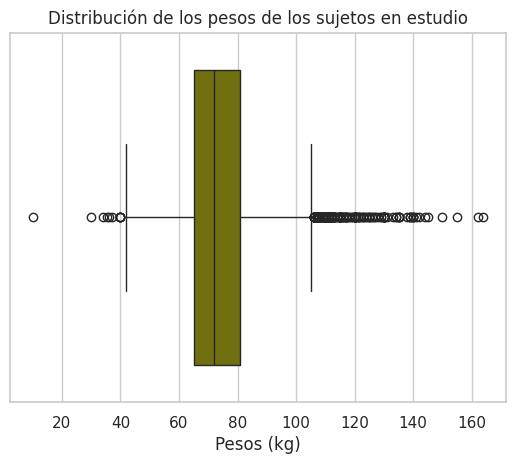

In [ ]:
# Boxplot de la distribución de las alturas de los sujetos en estudio
sns.set(style = "whitegrid")
sns.boxplot(x = df['weight'], color = "olive")
plt.title("Distribución de los pesos de los sujetos en estudio")
plt.xlabel("Pesos (kg)")
# Mostrar boxplot
plt.show()

In [ ]:
# Filtrar valores atipicos
iqr = df['weight'].quantile(0.75) - df['weight'].quantile(0.25)
filtro_inferior = df['weight'] > df['weight'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['weight'] < df['weight'].quantile(0.75) + (iqr * 1.5)
df_weight_filtrado = df[filtro_inferior & filtro_superior]

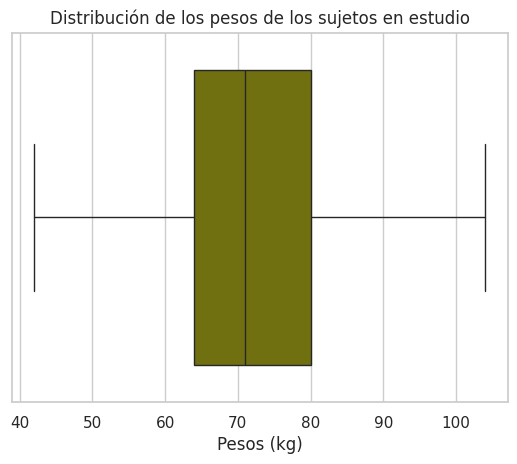

In [ ]:
# Crear gráfico con valores atipicos filtrados
sns.boxplot(x = df_weight_filtrado['weight'], color = "olive")
plt.title("Distribución de los pesos de los sujetos en estudio")
plt.xlabel("Pesos (kg)")

# Mostrar boxplot
plt.show()

Una vez filtrado los valores atipicos, podemos observar que la mayor proporción de sujetos en el estudio tienen pesos de entre 60 y 80 kg, sin embargo, el límite inferior se extiende a > 40 Kg y el limite superior a < 100 kg.


In [ ]:
#Peso promedio:
weight_mean_filtrado = df_weight_filtrado['weight'].mean()
print(f'- El peso promedio después de filtrar valores atipicos entre el número de personas registradas es de {round(weight_mean_filtrado, 2)} kilogramos.')

- El peso promedio después de filtrar valores atipicos entre el número de personas registradas es de 72.53 kilogramos.


In [ ]:
#Mediana de Peso:
weight_median_filtrado = df_weight_filtrado['weight'].median()
print(f'- La mediana de pesos después de filtrar valores atipicos entre el número de personas registradas es de {weight_median_filtrado} kilogramos.')

- La mediana de pesos después de filtrar valores atipicos entre el número de personas registradas es de 71.0 kilogramos.


In [ ]:
#Desviación estandar de la columna Peso:
standar_deviation_weight_filtrado = df_weight_filtrado['weight'].std()
print(f'- La desviación estandar después de filtrar valores atipicos del grupo pesos es de {standar_deviation_weight_filtrado:,.3f} kilogramos.')

- La desviación estandar después de filtrar valores atipicos del grupo pesos es de 11.900 kilogramos.


Colesterol

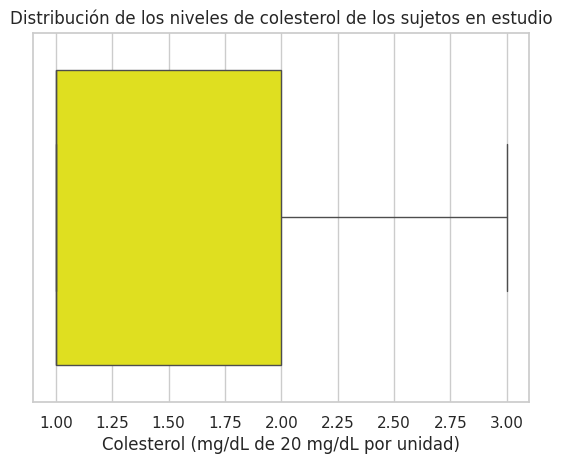

In [ ]:
# Boxplot de la distribución de los niveles de colesterol de los sujetos en estudio
sns.set(style = "whitegrid")
sns.boxplot(x = df['cholesterol'], color = "yellow")
plt.title("Distribución de los niveles de colesterol de los sujetos en estudio")
plt.xlabel("Colesterol (mg/dL de 20 mg/dL por unidad)")
# Mostrar boxplot
plt.show()

El gráfico anterior muestra la gran proporción de sujetos en estudio, muetran una distrubución normal de entre 1.00 y 2.00 mg/dL de 20 mg/dL por unidad, sin embargo, el limite superior se estiende hasta 3.00 mg/dL de 20 mg/dL por unidad; dado que se habla de un analito de importancia médica, que se describe a partir de valores de referencia, no es posible tener limites inferiores, ya que de lo contrario, las funciones biologicas y basales no se llevarian a cabo con normalidad.

Glucosa

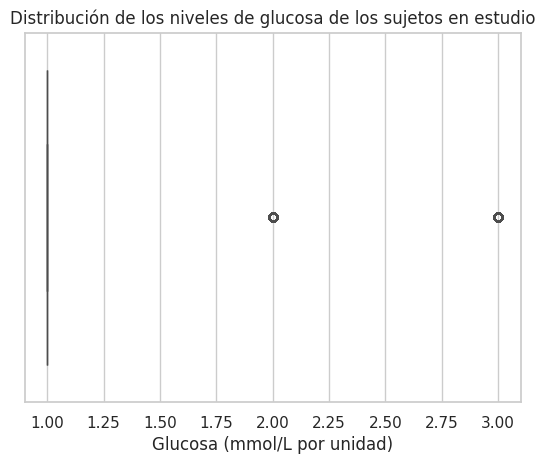

In [ ]:
# Boxplot de la distribución de los niveles de colesterol de los sujetos en estudio
sns.set(style = "whitegrid")
sns.boxplot(x = df['gluc'], color = "grey")
plt.title("Distribución de los niveles de glucosa de los sujetos en estudio")
plt.xlabel("Glucosa (mmol/L por unidad)")
# Mostrar boxplot
plt.show()

# Tablas de frecuencia e histogramas.

Edades

In [ ]:
ages = df['age']
ages.max() - ages.min()

25

In [ ]:
pd.cut(ages, 10)

0         (41.5, 44.0]
1       (38.975, 41.5]
2         (51.5, 54.0]
3         (46.5, 49.0]
4         (44.0, 46.5]
             ...      
6995      (56.5, 59.0]
6996      (49.0, 51.5]
6997      (56.5, 59.0]
6998      (61.5, 64.0]
6999      (49.0, 51.5]
Name: age, Length: 7000, dtype: category
Categories (10, interval[float64, right]): [(38.975, 41.5] < (41.5, 44.0] < (44.0, 46.5] <
                                            (46.5, 49.0] ... (54.0, 56.5] < (56.5, 59.0] <
                                            (59.0, 61.5] < (61.5, 64.0]]

In [ ]:
segmentos = pd.cut(ages, 10)

df['age'].groupby(segmentos).count()

age
(38.975, 41.5]     554
(41.5, 44.0]       514
(44.0, 46.5]       341
(46.5, 49.0]       750
(49.0, 51.5]       661
(51.5, 54.0]      1106
(54.0, 56.5]       728
(56.5, 59.0]      1048
(59.0, 61.5]       579
(61.5, 64.0]       719
Name: age, dtype: int64

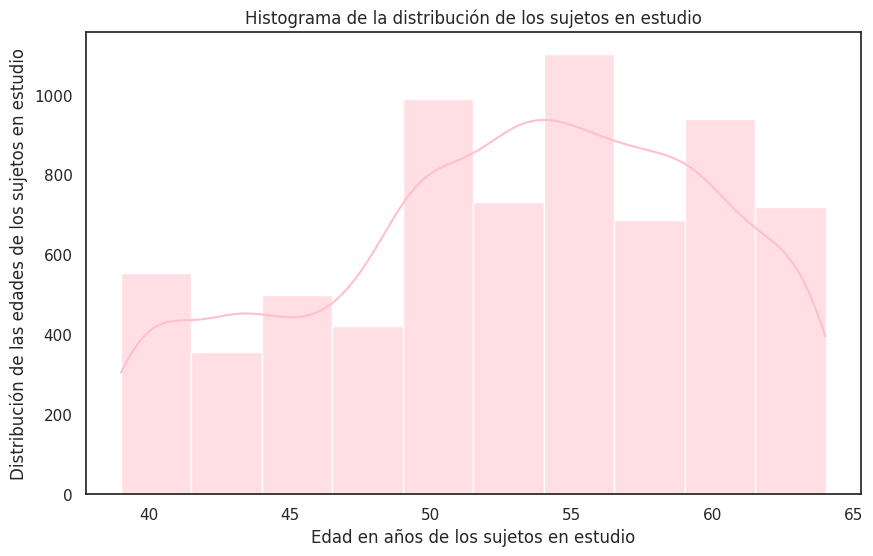

In [ ]:
# Crear un histograma para observar la dstribución de los datos.
sns.set(style ='white')
plt.figure(figsize = (10, 6))
sns.histplot(df['age'], kde = True, bins =10, stat ='count', color = "pink")
plt.title('Histograma de la distribución de los sujetos en estudio')
plt.xlabel('Edad en años de los sujetos en estudio')
plt.ylabel('Distribución de las edades de los sujetos en estudio')

plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
print(f'Curtosis: {kurtosis(ages)}')
print(f'Asimetría: {skew(ages)}')

Curtosis: -0.8358437935415601
Asimetría: -0.295641125554083


 Alturas

In [ ]:
alturas = df_height_filtrado['height']
alturas.max() - alturas.min()

43

In [ ]:
pd.cut(alturas, 20)

0       (151.6, 153.75]
1       (155.9, 158.05]
2       (164.5, 166.65]
3       (175.25, 177.4]
4       (164.5, 166.65]
             ...       
6995    (162.35, 164.5]
6996    (164.5, 166.65]
6997    (149.45, 151.6]
6998    (168.8, 170.95]
6999    (168.8, 170.95]
Name: height, Length: 6946, dtype: category
Categories (20, interval[float64, right]): [(142.957, 145.15] < (145.15, 147.3] < (147.3, 149.45] <
                                            (149.45, 151.6] ... (177.4, 179.55] < (179.55, 181.7] <
                                            (181.7, 183.85] < (183.85, 186.0]]

In [ ]:
segmentos = pd.cut(alturas, 20)

df_height_filtrado['height'].groupby(segmentos).count()

height
(142.957, 145.15]     30
(145.15, 147.3]       36
(147.3, 149.45]       72
(149.45, 151.6]      178
(151.6, 153.75]      217
(153.75, 155.9]      322
(155.9, 158.05]      808
(158.05, 160.2]      699
(160.2, 162.35]      474
(162.35, 164.5]      598
(164.5, 166.65]      805
(166.65, 168.8]      695
(168.8, 170.95]      685
(170.95, 173.1]      462
(173.1, 175.25]      343
(175.25, 177.4]      142
(177.4, 179.55]      172
(179.55, 181.7]      106
(181.7, 183.85]       60
(183.85, 186.0]       42
Name: height, dtype: int64

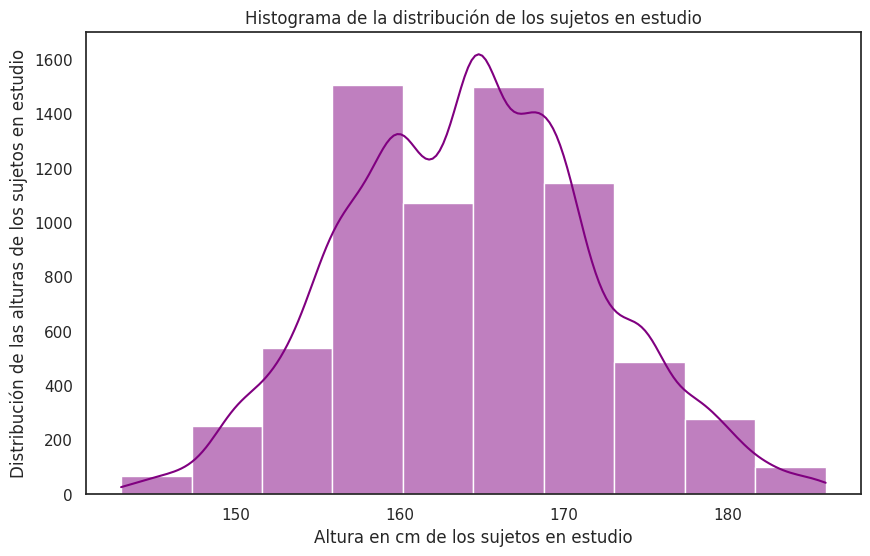

In [ ]:
# Crear un histograma para observar la dstribución de los datos.
sns.set(style ='white')
plt.figure(figsize = (10, 6))
sns.histplot(df_height_filtrado['height'], kde = True, bins =10, stat ='count', color = "purple")
plt.title('Histograma de la distribución de los sujetos en estudio')
plt.xlabel('Altura en cm de los sujetos en estudio')
plt.ylabel('Distribución de las alturas de los sujetos en estudio')

plt.show()

In [ ]:
print(f'Curtosis: {kurtosis(alturas)}')
print(f'Asimetría: {skew(alturas)}')

Curtosis: -0.24387636664193169
Asimetría: 0.08575436601575716


 Peso

In [ ]:
pesos = df_weight_filtrado['weight']
pesos.max() - pesos.min()

62.0

In [ ]:
pd.cut(alturas, 20)

0       (151.6, 153.75]
1       (155.9, 158.05]
2       (164.5, 166.65]
3       (175.25, 177.4]
4       (164.5, 166.65]
             ...       
6995    (162.35, 164.5]
6996    (164.5, 166.65]
6997    (149.45, 151.6]
6998    (168.8, 170.95]
6999    (168.8, 170.95]
Name: height, Length: 6946, dtype: category
Categories (20, interval[float64, right]): [(142.957, 145.15] < (145.15, 147.3] < (147.3, 149.45] <
                                            (149.45, 151.6] ... (177.4, 179.55] < (179.55, 181.7] <
                                            (181.7, 183.85] < (183.85, 186.0]]

In [ ]:
segmentos = pd.cut(alturas, 20)

df_weight_filtrado['weight'].groupby(segmentos).count()

height
(142.957, 145.15]     29
(145.15, 147.3]       35
(147.3, 149.45]       71
(149.45, 151.6]      176
(151.6, 153.75]      211
(153.75, 155.9]      314
(155.9, 158.05]      796
(158.05, 160.2]      684
(160.2, 162.35]      452
(162.35, 164.5]      576
(164.5, 166.65]      785
(166.65, 168.8]      678
(168.8, 170.95]      670
(170.95, 173.1]      437
(173.1, 175.25]      323
(175.25, 177.4]      129
(177.4, 179.55]      154
(179.55, 181.7]       89
(181.7, 183.85]       52
(183.85, 186.0]       33
Name: weight, dtype: int64

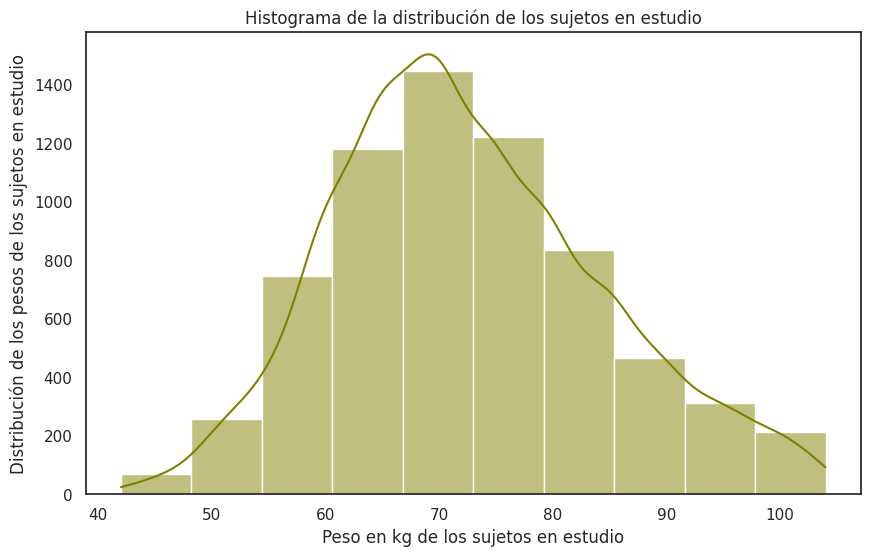

In [ ]:
# Crear un histograma para observar la dstribución de los datos.
sns.set(style ='white')
plt.figure(figsize = (10, 6))
sns.histplot(df_weight_filtrado['weight'], kde = True, bins =10, stat ='count', color = "olive")
plt.title('Histograma de la distribución de los sujetos en estudio')
plt.xlabel('Peso en kg de los sujetos en estudio')
plt.ylabel('Distribución de los pesos de los sujetos en estudio')

plt.show()

In [ ]:
print(f'Curtosis: {kurtosis(pesos)}')
print(f'Asimetría: {skew(pesos)}')

Curtosis: -0.2304002602126416
Asimetría: 0.35819682031292216


Colesterol

In [ ]:
colesterol = df['cholesterol']
colesterol.max() - colesterol.min()

2

In [ ]:
pd.cut(colesterol, 2)

0       (0.998, 2.0]
1       (0.998, 2.0]
2       (0.998, 2.0]
3       (0.998, 2.0]
4       (0.998, 2.0]
            ...     
6995    (0.998, 2.0]
6996    (0.998, 2.0]
6997    (0.998, 2.0]
6998    (0.998, 2.0]
6999    (0.998, 2.0]
Name: cholesterol, Length: 7000, dtype: category
Categories (2, interval[float64, right]): [(0.998, 2.0] < (2.0, 3.0]]

In [ ]:
segmentos = pd.cut(colesterol, 2)

df['cholesterol'].groupby(segmentos).count()

cholesterol
(0.998, 2.0]    6169
(2.0, 3.0]       831
Name: cholesterol, dtype: int64

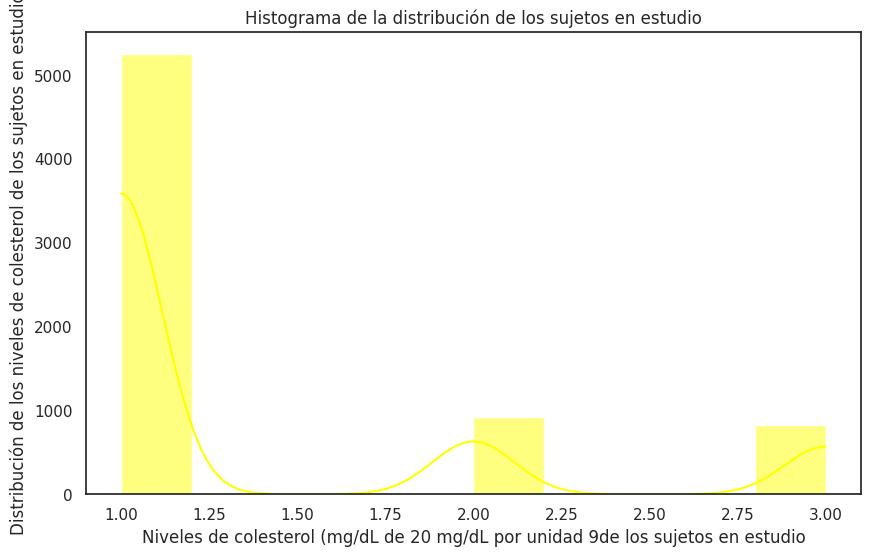

In [ ]:
# Crear un histograma para observar la dstribución de los datos.
sns.set(style ='white')
plt.figure(figsize = (10, 6))
sns.histplot(df['cholesterol'], kde = True, bins =10, stat ='count', color = "yellow")
plt.title('Histograma de la distribución de los sujetos en estudio')
plt.xlabel('Niveles de colesterol (mg/dL de 20 mg/dL por unidad 9de los sujetos en estudio')
plt.ylabel('Distribución de los niveles de colesterol de los sujetos en estudio')

plt.show()

Representar este tipo de datos en histogramas, no parece ser conventiente dado que los valores tienen un intervalo tan pequeño.

In [ ]:
print(f'Curtosis: {kurtosis(colesterol)}')
print(f'Asimetría: {skew(colesterol)}')

Curtosis: 0.9558131200047
Asimetría: 1.5828539832380264


 Glucosa

In [ ]:
glucosa = df['gluc']
glucosa.max() - glucosa.min()

2

In [ ]:
pd.cut(glucosa, 2)

0       (0.998, 2.0]
1       (0.998, 2.0]
2       (0.998, 2.0]
3       (0.998, 2.0]
4       (0.998, 2.0]
            ...     
6995    (0.998, 2.0]
6996    (0.998, 2.0]
6997    (0.998, 2.0]
6998    (0.998, 2.0]
6999    (0.998, 2.0]
Name: gluc, Length: 7000, dtype: category
Categories (2, interval[float64, right]): [(0.998, 2.0] < (2.0, 3.0]]

In [ ]:
segmentos = pd.cut(glucosa, 2)

df['gluc'].groupby(segmentos).count()

gluc
(0.998, 2.0]    6494
(2.0, 3.0]       506
Name: gluc, dtype: int64

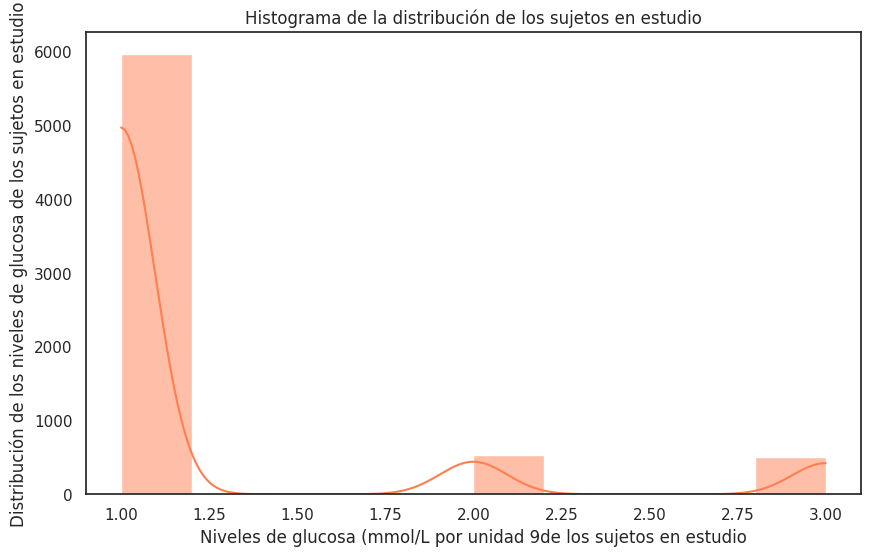

In [ ]:
# Crear un histograma para observar la dstribución de los datos.
sns.set(style ='white')
plt.figure(figsize = (10, 6))
sns.histplot(df['gluc'], kde = True, bins =10, stat ='count', color = "coral")
plt.title('Histograma de la distribución de los sujetos en estudio')
plt.xlabel('Niveles de glucosa (mmol/L por unidad 9de los sujetos en estudio')
plt.ylabel('Distribución de los niveles de glucosa de los sujetos en estudio')

plt.show()

In [ ]:
print(f'Curtosis: {kurtosis(glucosa)}')
print(f'Asimetría: {skew(glucosa)}')

Curtosis: 4.552666736182397
Asimetría: 2.442125885989204


Gráficas de densidad.

In [ ]:
# Impotaciones
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Configurando el estilo
sns.set(style='whitegrid')

In [ ]:
# Generando los datos para cada distribución
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
chisquare = np.random.chisquare(4, size=10000)
normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

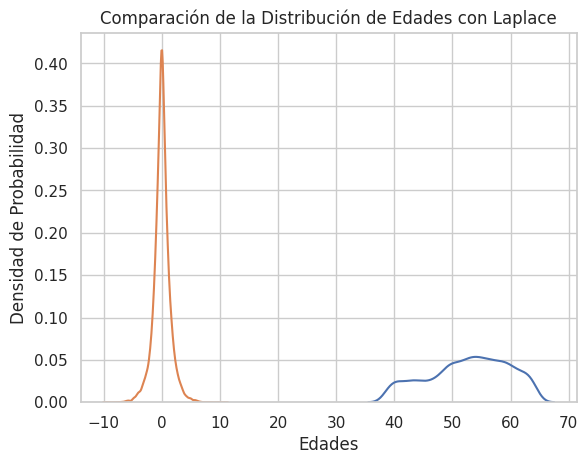

In [ ]:
# Crear el gráfico de distribución de Laplace
sns.kdeplot(df['age'], label='Edades')
sns.kdeplot(laplace, label='Distribución de Laplace')
plt.title('Comparación de la Distribución de Edades con Laplace')
plt.xlabel('Edades')
plt.ylabel('Densidad de Probabilidad')

plt.show()

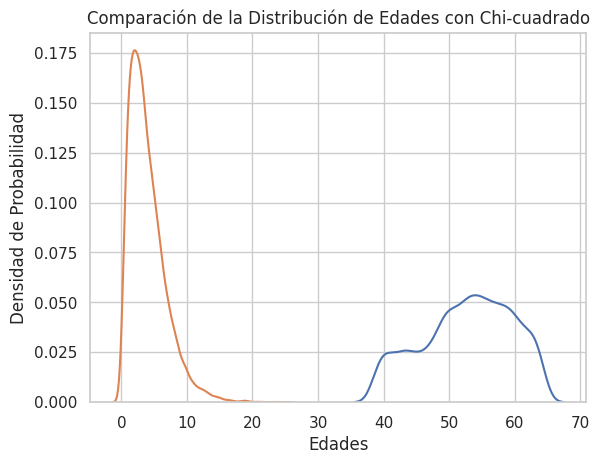

In [ ]:
# Crear el gráfico de distribución de Chi-cuadrado
sns.kdeplot(df['age'], label='Edades')
sns.kdeplot(chisquare, label='Distribución de Chi cuadrado')
plt.title('Comparación de la Distribución de Edades con Chi-cuadrado')
plt.xlabel('Edades')
plt.ylabel('Densidad de Probabilidad')

plt.show()

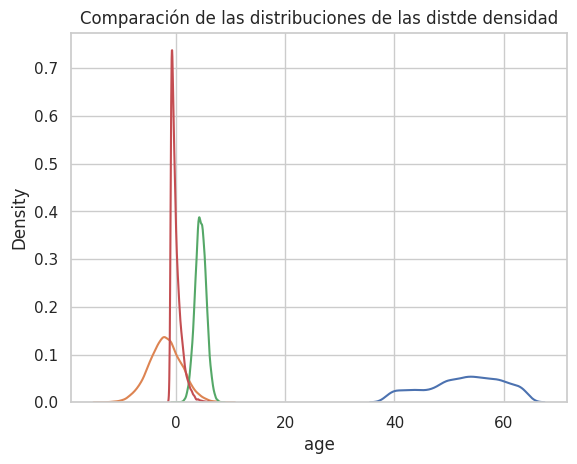

In [ ]:
sns.kdeplot(df['age'], label='Edades')
sns.kdeplot(normal_1, label='Distribución Normal (Media -2, DS 3)')
sns.kdeplot(normal_2, label='Distribución Normal (Media 4.5, DS 1)')
sns.kdeplot(exponential, label='Distribución Exponencial (Desplazada -1)')
plt.title('Comparación de las distribuciones de las distde densidad')
plt.show()

Altura

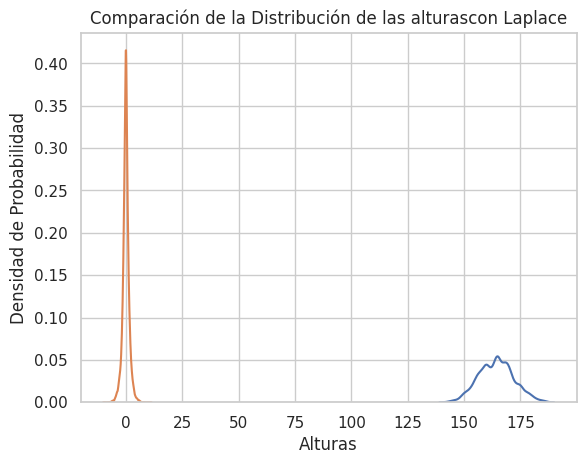

In [ ]:
# Crear el gráfico de distribución de Laplace
sns.kdeplot(df_height_filtrado['height'], label='Alturas')
sns.kdeplot(laplace, label='Distribución de Laplace')
plt.title('Comparación de la Distribución de las alturascon Laplace')
plt.xlabel('Alturas')
plt.ylabel('Densidad de Probabilidad')

plt.show()

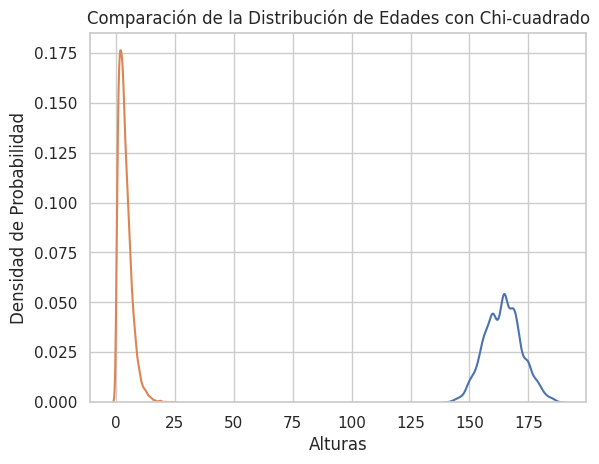

In [ ]:
# Crear el gráfico de distribución de Chi-cuadrado
sns.kdeplot(df_height_filtrado['height'], label='Alturas')
sns.kdeplot(chisquare, label='Distribución de Laplace')
plt.title('Comparación de la Distribución de Edades con Chi-cuadrado')
plt.xlabel('Alturas')
plt.ylabel('Densidad de Probabilidad')

plt.show()

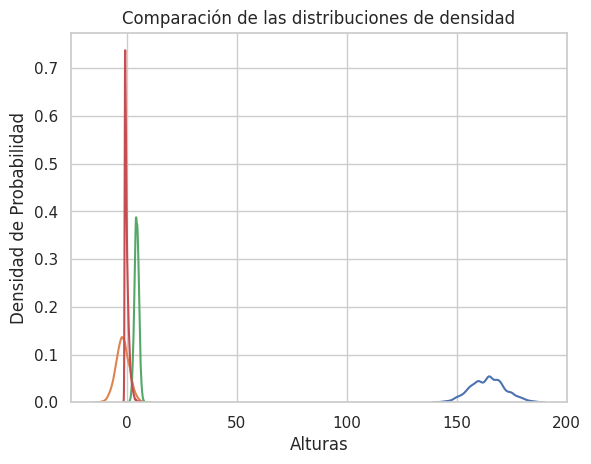

In [ ]:
sns.kdeplot(df_height_filtrado['height'], label='Alturas')
sns.kdeplot(normal_1, label='Distribución Normal (Media -2, DS 3)')
sns.kdeplot(normal_2, label='Distribución Normal (Media 4.5, DS 1)')
sns.kdeplot(exponential, label='Distribución Exponencial (Desplazada -1)')
plt.title('Comparación de las distribuciones de densidad')
plt.xlabel('Alturas')
plt.ylabel('Densidad de Probabilidad')
plt.show()

Peso

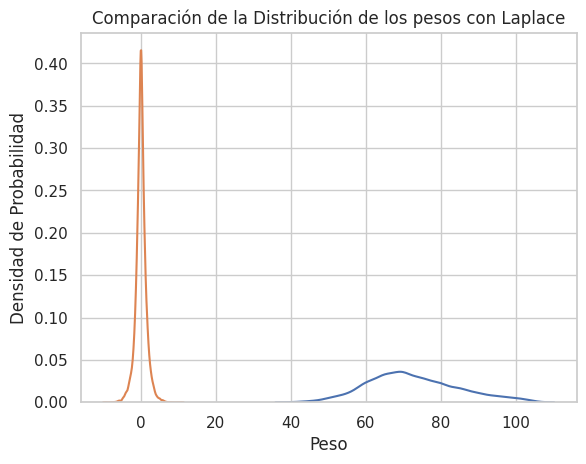

In [ ]:
# Crear el gráfico de distribución de Laplace
sns.kdeplot(df_weight_filtrado['weight'], label='Peso')
sns.kdeplot(laplace, label='Distribución de Laplace')
plt.title('Comparación de la Distribución de los pesos con Laplace')
plt.xlabel('Peso')
plt.ylabel('Densidad de Probabilidad')

plt.show()

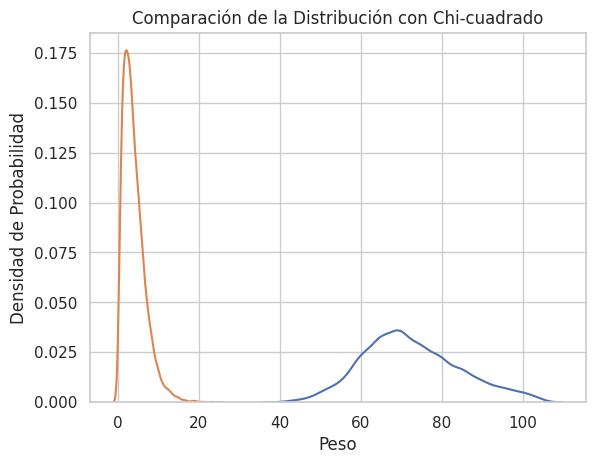

In [ ]:
# Crear el gráfico de distribución de Chi-cuadrado
sns.kdeplot(df_weight_filtrado['weight'], label='Peso')
sns.kdeplot(chisquare, label='Distribución de Laplace')
plt.title('Comparación de la Distribución con Chi-cuadrado')
plt.xlabel('Peso')
plt.ylabel('Densidad de Probabilidad')

plt.show()

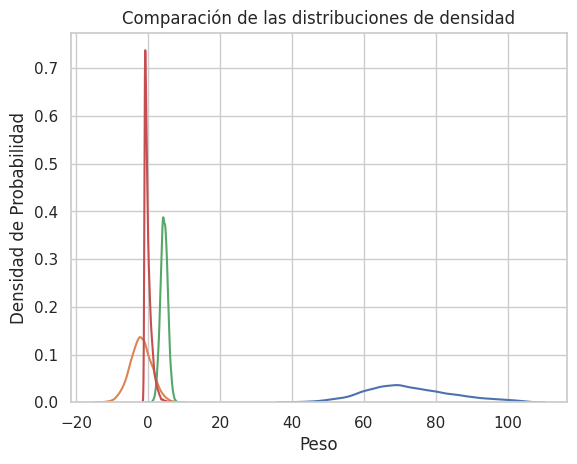

In [ ]:
sns.kdeplot(df_weight_filtrado['weight'], label='Peso')
sns.kdeplot(normal_1, label='Distribución Normal (Media -2, DS 3)')
sns.kdeplot(normal_2, label='Distribución Normal (Media 4.5, DS 1)')
sns.kdeplot(exponential, label='Distribución Exponencial (Desplazada -1)')
plt.title('Comparación de las distribuciones de densidad')
plt.xlabel('Peso')
plt.ylabel('Densidad de Probabilidad')
plt.show()

Colesterol

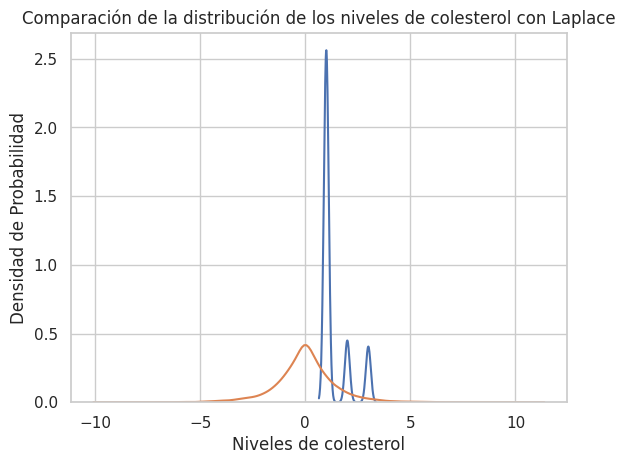

In [ ]:
# Crear el gráfico de distribución de Laplace
sns.kdeplot(df['cholesterol'], label='Colesterol')
sns.kdeplot(laplace, label='Distribución de Laplace')
plt.title('Comparación de la distribución de los niveles de colesterol con Laplace')
plt.xlabel('Niveles de colesterol')
plt.ylabel('Densidad de Probabilidad')

plt.show()

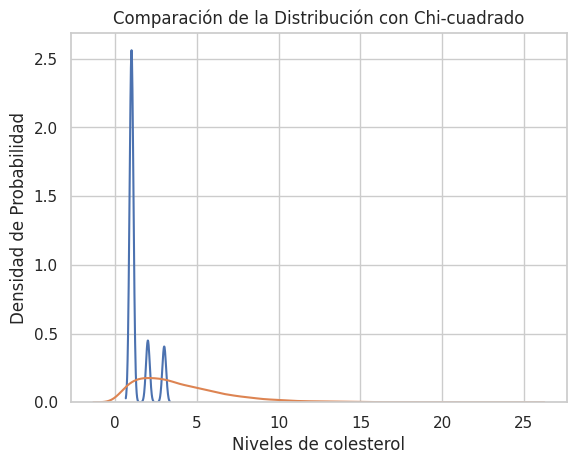

In [ ]:
# Crear el gráfico de distribución de Chi-cuadrado
sns.kdeplot(df['cholesterol'], label='Colesterol')
sns.kdeplot(chisquare, label='Distribución de Laplace')
plt.title('Comparación de la Distribución con Chi-cuadrado')
plt.xlabel('Niveles de colesterol')
plt.ylabel('Densidad de Probabilidad')

plt.show()

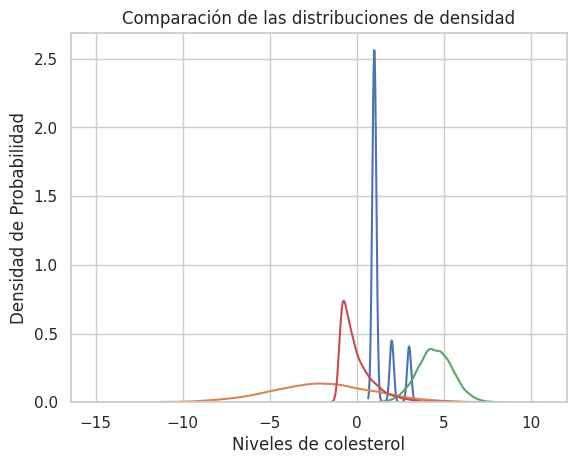

In [ ]:
sns.kdeplot(df['cholesterol'], label='Colesterol')
sns.kdeplot(normal_1, label='Distribución Normal (Media -2, DS 3)')
sns.kdeplot(normal_2, label='Distribución Normal (Media 4.5, DS 1)')
sns.kdeplot(exponential, label='Distribución Exponencial (Desplazada -1)')
plt.title('Comparación de las distribuciones de densidad')
plt.xlabel('Niveles de colesterol')
plt.ylabel('Densidad de Probabilidad')
plt.show()

Glucosa

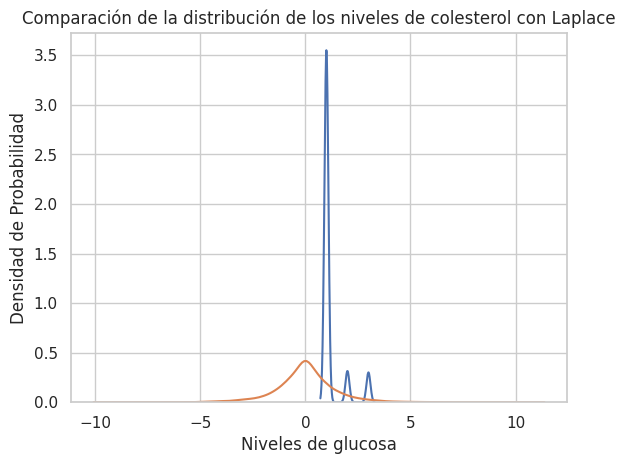

In [ ]:
# Crear el gráfico de distribución de Laplace
sns.kdeplot(df['gluc'], label='Glucosa')
sns.kdeplot(laplace, label='Distribución de Laplace')
plt.title('Comparación de la distribución de los niveles de colesterol con Laplace')
plt.xlabel('Niveles de glucosa')
plt.ylabel('Densidad de Probabilidad')

plt.show()

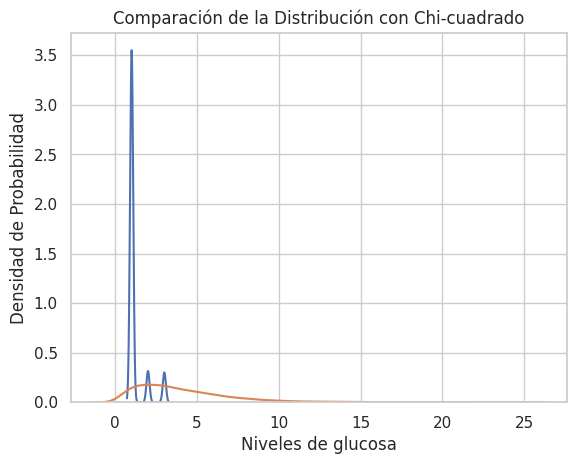

In [ ]:
# Crear el gráfico de distribución de Chi-cuadrado
sns.kdeplot(df['gluc'], label='Glucosa')
sns.kdeplot(chisquare, label='Distribución de Laplace')
plt.title('Comparación de la Distribución con Chi-cuadrado')
plt.xlabel('Niveles de glucosa')
plt.ylabel('Densidad de Probabilidad')

plt.show()

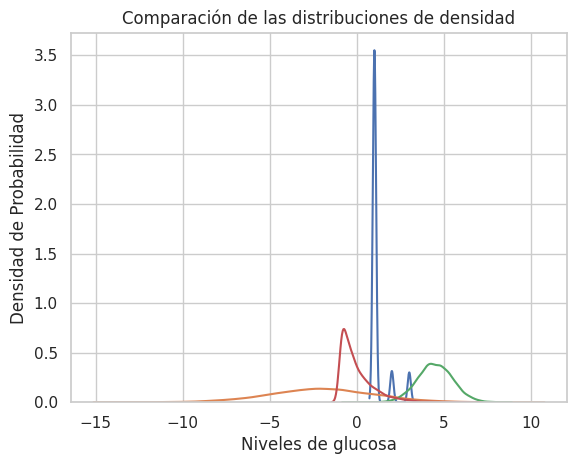

In [ ]:
sns.kdeplot(df['gluc'], label='Glucosa')
sns.kdeplot(normal_1, label='Distribución Normal (Media -2, DS 3)')
sns.kdeplot(normal_2, label='Distribución Normal (Media 4.5, DS 1)')
sns.kdeplot(exponential, label='Distribución Exponencial (Desplazada -1)')
plt.title('Comparación de las distribuciones de densidad')
plt.xlabel('Niveles de glucosa')
plt.ylabel('Densidad de Probabilidad')
plt.show()

# 3. Gráficas de barras: Frecuencia y Porcentaje

Para trabajar la frecuencia y porcentaje en gráficas de barras usamos las siguientes variables:
* smoke
* active
* género

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [ ]:
df.head()

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,44,M,153,93.0,1,1,False,True,True
1,39,M,157,89.0,1,1,False,True,True
2,54,M,165,66.0,1,1,False,True,True
3,49,F,176,88.0,2,2,True,True,True
4,46,F,165,78.0,1,1,False,False,True


In [ ]:
df['smoke'].unique()

array([False,  True])

In [ ]:
df['smoke'].unique()

array([False,  True])

In [ ]:
df['smoke'].nunique()

2

In [ ]:
df['smoke'].value_counts()

False    6394
True      606
Name: smoke, dtype: int64

In [ ]:
counts = df['smoke'].value_counts()

[Text(0.5, 0, ' ')]

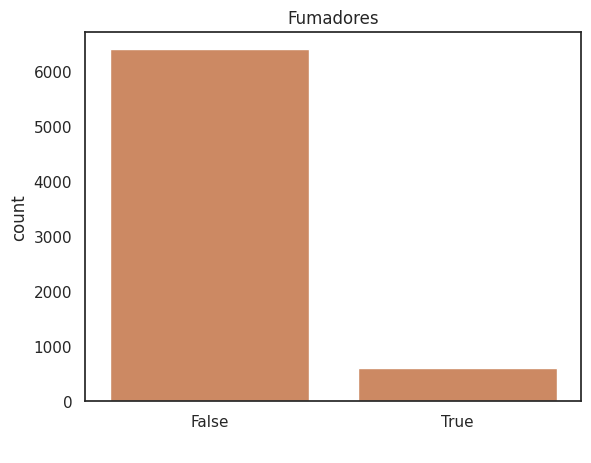

In [ ]:
ax = sns.barplot(counts)
ax = sns.barplot(x = counts.index, y = counts)
ax.set_title('Fumadores')
ax.set(ylabel='count')
ax.set(xlabel=' ')

In [ ]:
counts * 100 / counts.sum()

False    91.342857
True      8.657143
Name: smoke, dtype: float64

In [ ]:
as_percentages = counts * 100 / counts.sum()

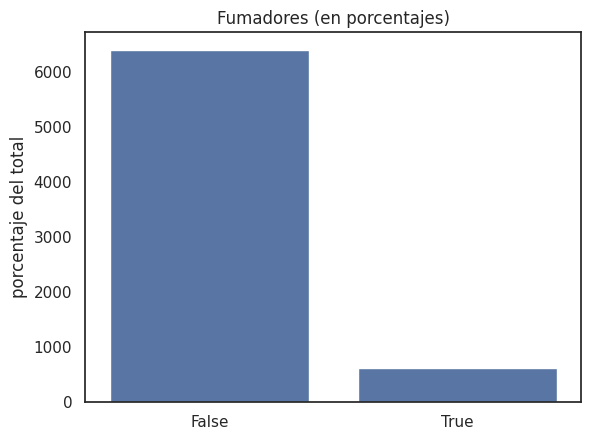

In [ ]:
ax = sns.barplot(counts)
ax.set_title('Fumadores (en porcentajes)')
ax.set(ylabel='porcentaje del total');

<ipython-input-94-37315a868c30>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


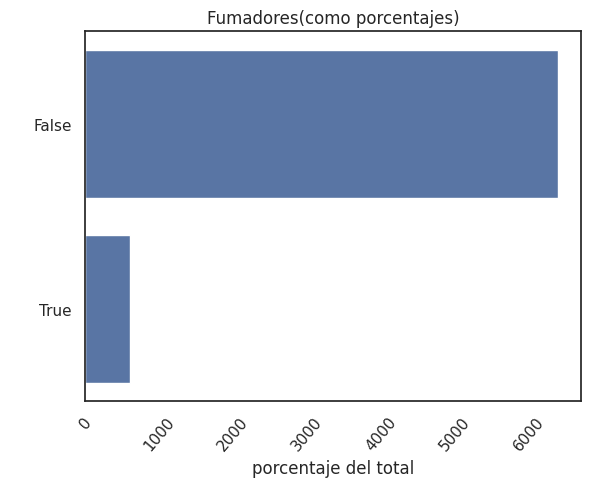

In [ ]:
ax = sns.barplot(counts, orient='h')
ax.set_title('Fumadores(como porcentajes)')
ax.set(xlabel='porcentaje del total')
ax.set(ylabel=' ')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [ ]:
df['active'].unique()
df['active'].nunique()
df['active'].value_counts()


True     5616
False    1384
Name: active, dtype: int64

In [ ]:
counts = df['active'].value_counts()

[Text(0.5, 0, ' ')]

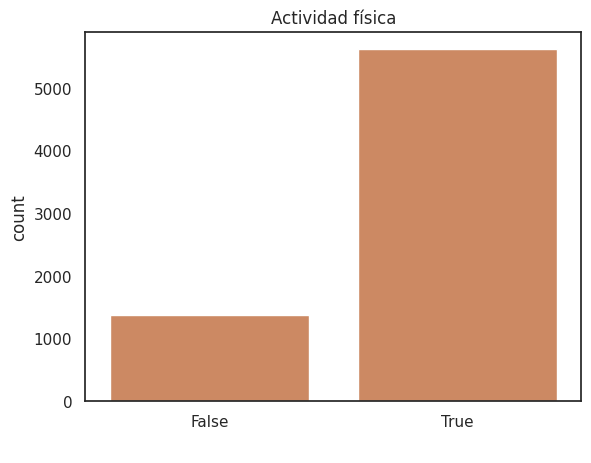

In [ ]:
ax = sns.barplot(counts)
ax = sns.barplot(x = counts.index, y = counts)
ax.set_title('Actividad física')
ax.set(ylabel='count')
ax.set(xlabel=' ')

In [ ]:
counts * 100 / counts.sum()

True     80.228571
False    19.771429
Name: active, dtype: float64

In [ ]:
as_percentages = counts * 100 / counts.sum()

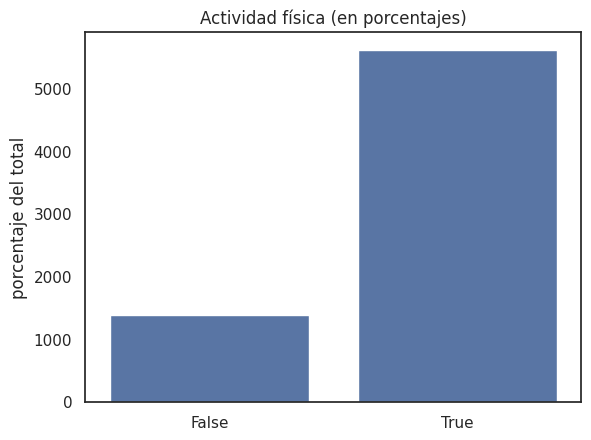

In [ ]:
ax = sns.barplot(counts)
ax.set_title('Actividad física (en porcentajes)')
ax.set(ylabel='porcentaje del total');

<ipython-input-101-a1b2cf4e2736>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


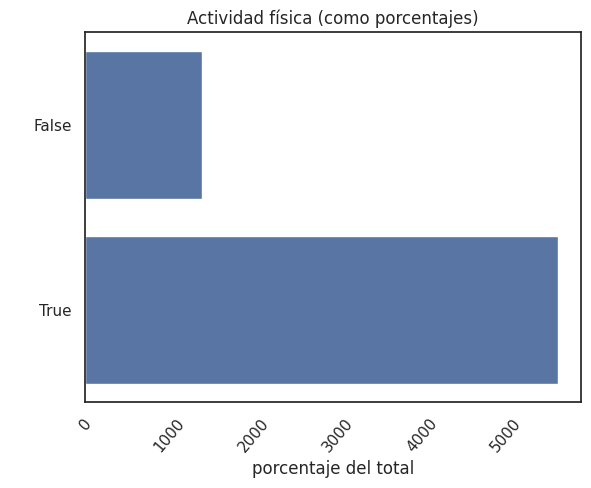

In [ ]:
ax = sns.barplot(counts, orient='h')
ax.set_title('Actividad física (como porcentajes)')
ax.set(xlabel='porcentaje del total')
ax.set(ylabel=' ')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [ ]:
df['gender'].unique()
df['gender'].nunique()
df['gender'].value_counts()

M    4536
F    2464
Name: gender, dtype: int64

In [ ]:
counts = df['gender'].value_counts()

[Text(0.5, 0, ' ')]

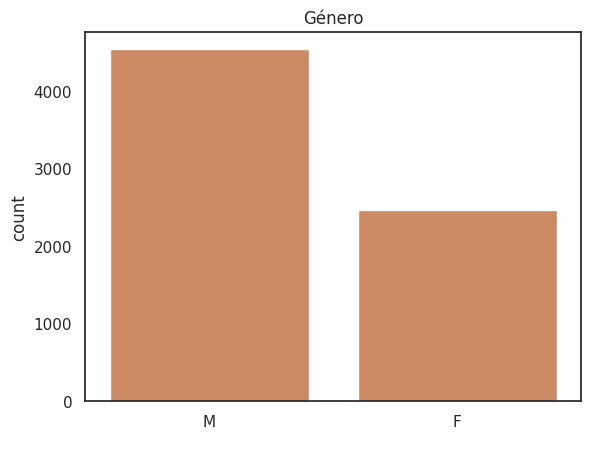

In [ ]:
ax = sns.barplot(counts)
ax = sns.barplot(x = counts.index, y = counts)
ax.set_title('Género')
ax.set(ylabel='count')
ax.set(xlabel=' ')

In [ ]:
counts * 100 / counts.sum()

M    64.8
F    35.2
Name: gender, dtype: float64

In [ ]:
as_percentages = counts * 100 / counts.sum()

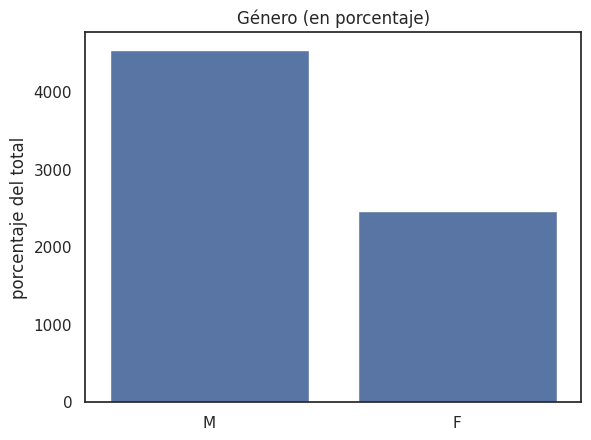

In [ ]:
ax = sns.barplot(counts)
ax.set_title('Género (en porcentaje)')
ax.set(ylabel='porcentaje del total');

<ipython-input-108-fe2ac201c38e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


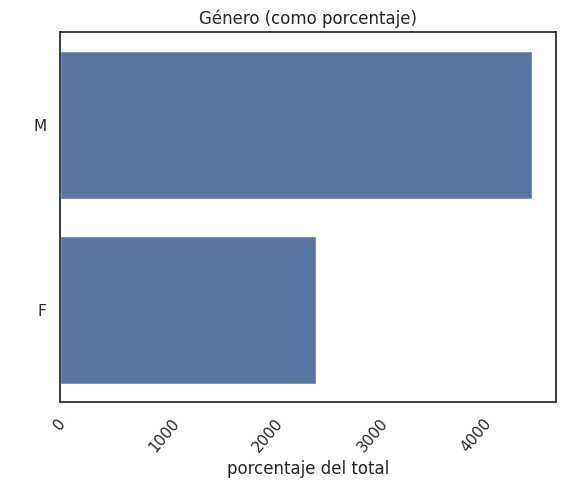

In [ ]:
ax = sns.barplot(counts, orient='h')
ax.set_title('Género (como porcentaje)')
ax.set(xlabel='porcentaje del total')
ax.set(ylabel=' ')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

Obtuvimos las gráficas de frecuencia y porcentaje del género de los pacientes, la actividad física que realizan y del hábito de fumar.

Tablas de contingencia y gráficas

Trabajamos con las siguientes variables categóricas:

*   gender - smoke
*   gender - active



In [ ]:
!pip install pandas
import pandas as pd
pd.crosstab?

In [ ]:
import pandas as pd

In [ ]:
df.head()

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,44,M,153,93.0,1,1,False,True,True
1,39,M,157,89.0,1,1,False,True,True
2,54,M,165,66.0,1,1,False,True,True
3,49,F,176,88.0,2,2,True,True,True
4,46,F,165,78.0,1,1,False,False,True


In [ ]:
pd.crosstab(df['gender'], df['smoke'], df['cardio'], aggfunc='mean', margins=True, margins_name='total')

smoke,False,True,total
gender,,,
F,0.525720,0.523077,0.525162
M,0.492809,0.523256,0.493386
total,0.502815,0.523102,0.504571


<Axes: xlabel='gender'>

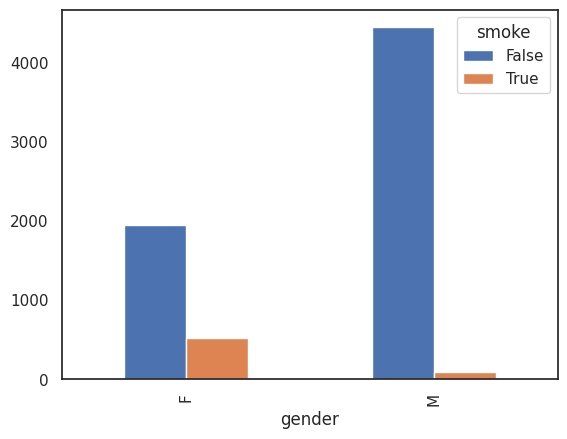

In [ ]:
pd.crosstab(df['gender'], df['smoke']).plot(kind='bar')

In [ ]:
pd.crosstab(df['gender'], df['active'], values=df['weight'], aggfunc='mean', margins=True, margins_name='total')

active,False,True,total
gender,,,
F,78.546908,76.870276,77.189407
M,72.610492,72.137904,72.233234
total,74.622182,73.819008,73.977807


<Axes: xlabel='gender'>

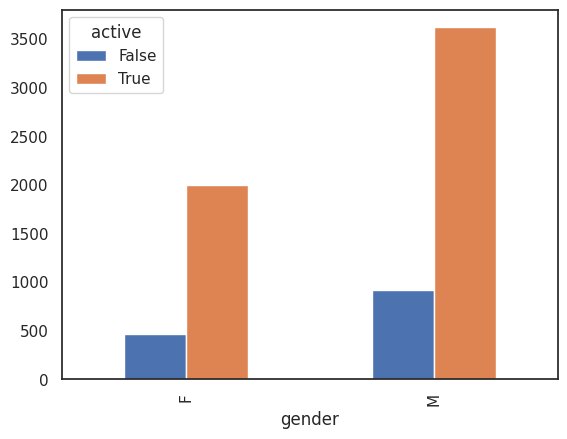

In [ ]:
pd.crosstab(df['gender'], df['active']).plot(kind='bar')

En el caso de este dataset, lo más conveniente para trabajar variables categóricas era utlizar gender - smoke y gender - active. Ya que usar las variables como glucosa o colesterol era impráctico.

# 4. Correlaciones y Regresión Linear simple

Podemos confirmar que no contamos con valores nulos y que nuestros valores númericos son:
- age (edad)
- height (altura)
- weight (peso)
- cholesterol (colesterol)
- gluc (glucosa)

Generamos una matriz de correlación de Pearson unicamente con los valores numericos




In [ ]:
#Filtramos las columnas numericas
datos_numericos = df [['age', 'height', 'weight', 'cholesterol', 'gluc']]
datos_numericos.head()

,age,height,weight,cholesterol,gluc
0,44,153,93.0,1,1
1,39,157,89.0,1,1
2,54,165,66.0,1,1
3,49,176,88.0,2,2
4,46,165,78.0,1,1


In [ ]:
#Creamos la correlación
corr_num = datos_numericos.corr()
corr_num.head()

,age,height,weight,cholesterol,gluc
age,1.000000,-0.073609,0.060519,0.147298,0.101623
height,-0.073609,1.000000,0.299108,-0.042988,-0.017567
weight,0.060519,0.299108,1.000000,0.131978,0.094608
cholesterol,0.147298,-0.042988,0.131978,1.000000,0.477629
gluc,0.101623,-0.017567,0.094608,0.477629,1.000000


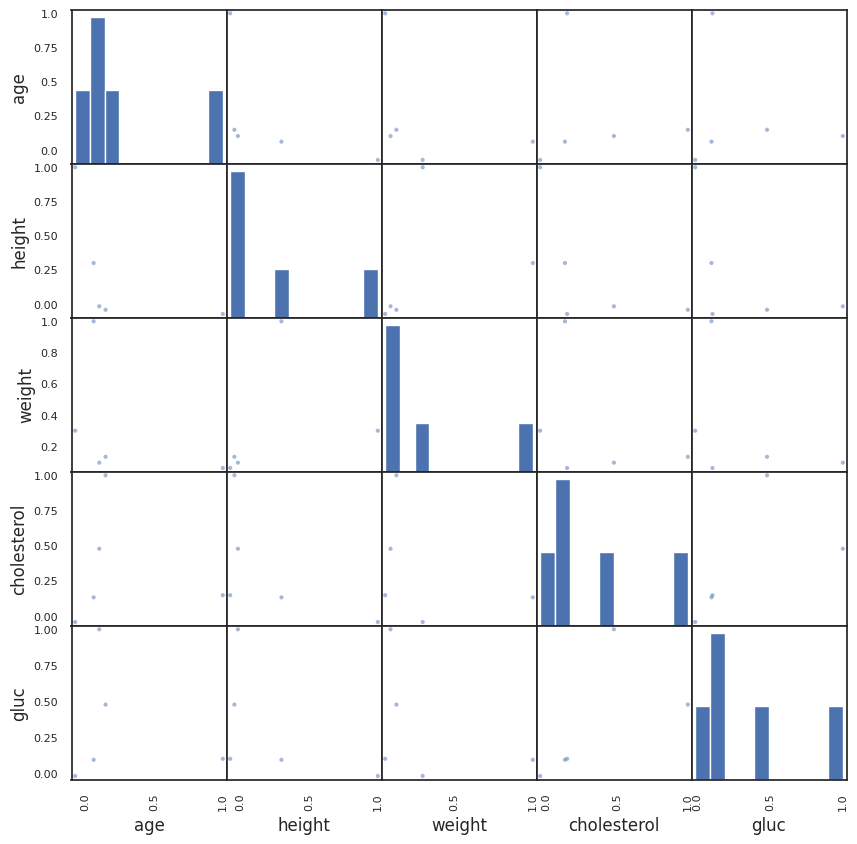

In [ ]:
#Usando pairplot revisamos la correlacion, se usó una función alternativa
pd.plotting.scatter_matrix(corr_num, figsize=(10, 10), diagonal='hist')
plt.show()

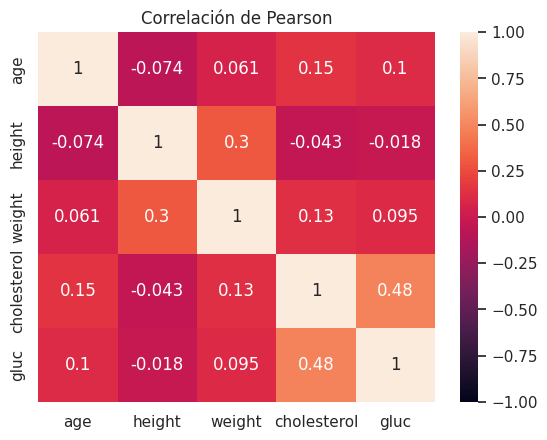

In [ ]:
#Creamos un mapa de calor para visualizar mejor la correlacion
sns.heatmap(corr_num, annot=True, vmax=1, vmin=-1)
plt.title ('Correlación de Pearson')
plt.show()

Encontramos correlaciones positivas aunque no muy significativas entre el colesterol y la glucosa, el peso y la glucosa, así como el colesterol y la edad.

 Identificación de valores atípicos
Gracias a lo realizado anteriormente en el [Punto 5.1](https://colab.research.google.com/drive/1Ja3sfXWsttlbWeD9dFdZIeOQfjnV1tbk#scrollTo=9XsOeuYTx0dN) podemos saber que los valores atipicos se encuentran en el peso (weight) y la altura (height)

Se filtrarán nuevamente los datos para remover los atipicos y ver si la correlación sufre algun cambio

In [ ]:
#Eliminacion de datos atipicos
datos_numericos_filtrados = pd.merge(df_weight_filtrado, df_height_filtrado, how='inner')
datos_no_numericos =['gender', 'smoke', 'active', 'cardio']
datos_numericos_filtrados = datos_numericos_filtrados.drop(datos_no_numericos, axis=1)

datos_numericos_filtrados.head()

,age,height,weight,cholesterol,gluc
0,44,153,93.0,1,1
1,39,157,89.0,1,1
2,54,165,66.0,1,1
3,49,176,88.0,2,2
4,46,165,78.0,1,1


In [ ]:
#Generamos nuevamente la correlacion numerica
corr_num_filtrado = datos_numericos_filtrados.corr()
corr_num_filtrado.head()

,age,height,weight,cholesterol,gluc
age,1.000000,-0.081450,0.073238,0.150315,0.106520
height,-0.081450,1.000000,0.309750,-0.068284,-0.035292
weight,0.073238,0.309750,1.000000,0.123650,0.074877
cholesterol,0.150315,-0.068284,0.123650,1.000000,0.485875
gluc,0.106520,-0.035292,0.074877,0.485875,1.000000


Podemos confirmar que no contamos con valores nulos y que nuestros valores númericos son:
- age (edad)
- height (altura)
- weight (peso)
- cholesterol (colesterol)
- gluc (glucosa)

Generamos una matriz de correlación de Pearson unicamente con los valores numericos




In [ ]:
#Filtramos las columnas numericas
datos_numericos = df [['age', 'height', 'weight', 'cholesterol', 'gluc']]
datos_numericos.head()

,age,height,weight,cholesterol,gluc
0,44,153,93.0,1,1
1,39,157,89.0,1,1
2,54,165,66.0,1,1
3,49,176,88.0,2,2
4,46,165,78.0,1,1


In [ ]:
#Creamos la correlación
corr_num = datos_numericos.corr()
corr_num.head()

,age,height,weight,cholesterol,gluc
age,1.000000,-0.073609,0.060519,0.147298,0.101623
height,-0.073609,1.000000,0.299108,-0.042988,-0.017567
weight,0.060519,0.299108,1.000000,0.131978,0.094608
cholesterol,0.147298,-0.042988,0.131978,1.000000,0.477629
gluc,0.101623,-0.017567,0.094608,0.477629,1.000000


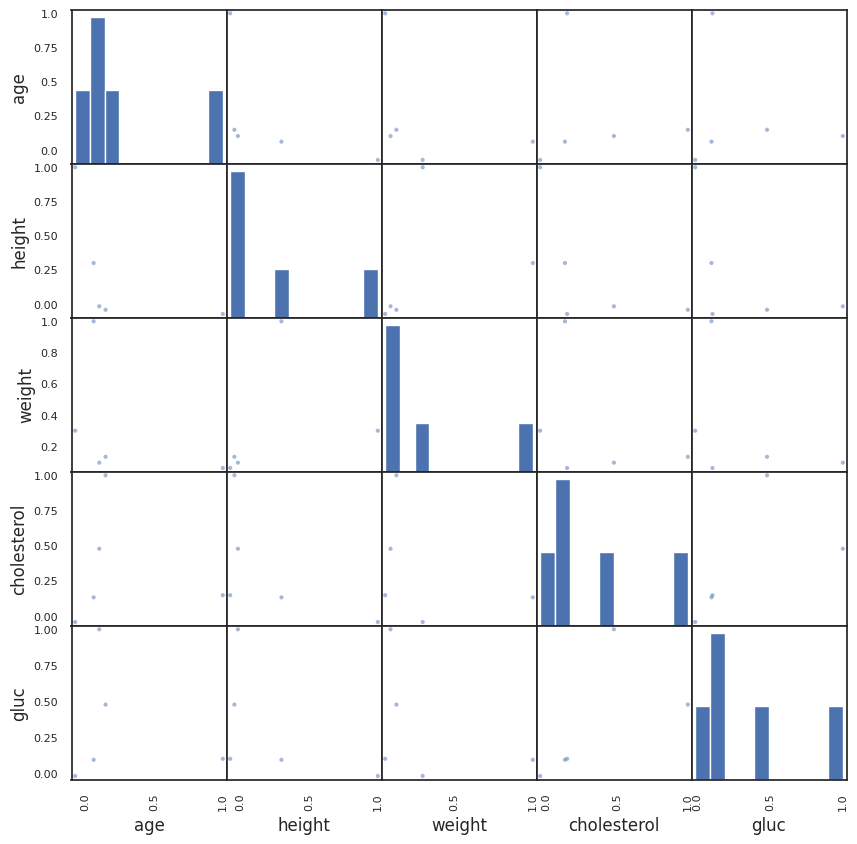

In [ ]:
#Usando pairplot revisamos la correlacion, se usó una función alternativa
pd.plotting.scatter_matrix(corr_num, figsize=(10, 10), diagonal='hist')
plt.show()

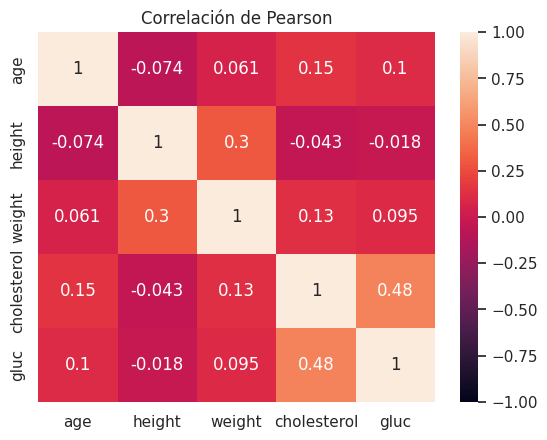

In [ ]:
#Creamos un mapa de calor para visualizar mejor la correlacion
sns.heatmap(corr_num, annot=True, vmax=1, vmin=-1)
plt.title ('Correlación de Pearson')
plt.show()

Encontramos correlaciones positivas aunque no muy significativas entre el colesterol y la glucosa, el peso y la glucosa, así como el colesterol y la edad.

Identificación de valores atípicos

Gracias a lo realizado anteriormente en el [Punto 2](https://colab.research.google.com/drive/1Ja3sfXWsttlbWeD9dFdZIeOQfjnV1tbk#scrollTo=9XsOeuYTx0dN) podemos saber que los valores atipicos se encuentran en el peso (weight) y la altura (height)

Se filtrarán nuevamente los datos para remover los atipicos y ver si la correlación sufre algun cambio

In [ ]:
#Generamos nuevamente la correlacion numerica
corr_num_filtrado = datos_numericos_filtrados.corr()
corr_num_filtrado.head()

,age,height,weight,cholesterol,gluc
age,1.000000,-0.081450,0.073238,0.150315,0.106520
height,-0.081450,1.000000,0.309750,-0.068284,-0.035292
weight,0.073238,0.309750,1.000000,0.123650,0.074877
cholesterol,0.150315,-0.068284,0.123650,1.000000,0.485875
gluc,0.106520,-0.035292,0.074877,0.485875,1.000000


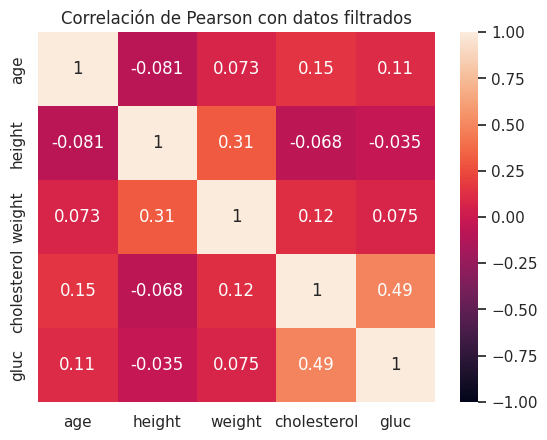

In [ ]:
#Volvemos a generar nuestro grafico de correlación para ver si existe algún cambio
sns.heatmap(corr_num_filtrado, annot=True, vmax=1, vmin=-1)
plt.title ('Correlación de Pearson con datos filtrados')
plt.show()

Podemos notar que los cambios en las correlaciones son minimos despues del filtrado de los datos y que se mantiene la correlación positiva entre el peso y el colesterol, la edad y el colesterol, la edad y la glucosa, la glucosa y el colesterol así como entre el peso y la glucosa

Modelos de regresión lineal

En este caso como identificamos que hay correlación entre algunos de nuestros datos utilizaremos estas relaciones para crear los modelos de regresión lineal, trabajaremos con
- Edad y colesterol
- Glucosa y colesterol

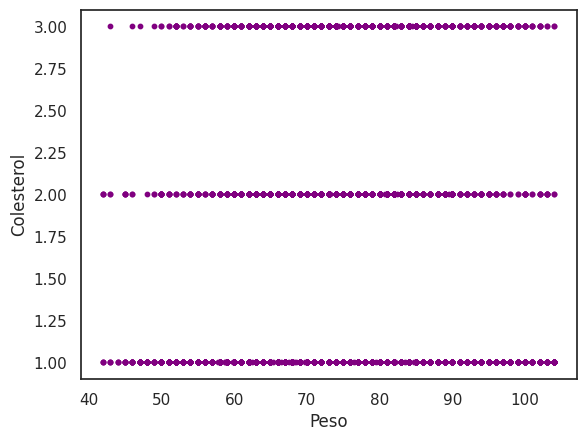

In [ ]:
#Vemos la relación entre el colesterol y el peso
plt.scatter(x= datos_numericos_filtrados['weight'], y= datos_numericos_filtrados['cholesterol'], color='purple', s=10)
plt.xlabel("Peso")
plt.ylabel("Colesterol")
plt.show()

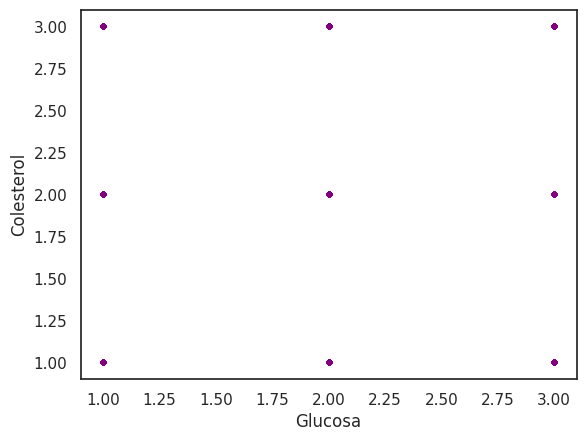

In [ ]:
#Vemos la relación entre el colesterol y la glucosa
plt.scatter(x= datos_numericos_filtrados['gluc'], y= datos_numericos_filtrados['cholesterol'], color='purple', s= 10, alpha=0.5)
plt.xlabel("Glucosa")
plt.ylabel("Colesterol")
plt.show()

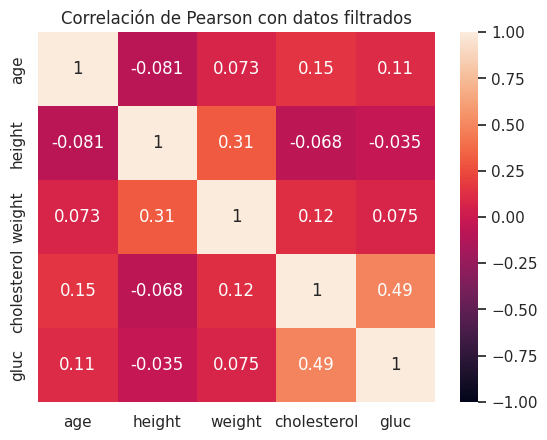

In [ ]:
#Volvemos a generar nuestro grafico de correlación para ver si existe algún cambio
sns.heatmap(corr_num_filtrado, annot=True, vmax=1, vmin=-1)
plt.title ('Correlación de Pearson con datos filtrados')
plt.show()

Podemos notar que los cambios en las correlaciones son minimos despues del filtrado de los datos y que se mantiene la correlación positiva entre el peso y el colesterol, la edad y el colesterol, la edad y la glucosa, la glucosa y el colesterol así como entre el peso y la glucosa

Modelos de regresión lineal

En este caso como identificamos que hay correlación entre algunos de nuestros datos utilizaremos estas relaciones para crear los modelos de regresión lineal, trabajaremos con
- Edad y colesterol
- Glucosa y colesterol

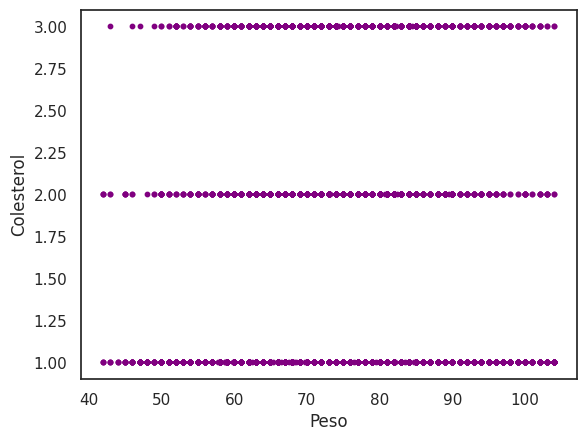

In [ ]:
#Vemos la relación entre el colesterol y el peso
plt.scatter(x= datos_numericos_filtrados['weight'], y= datos_numericos_filtrados['cholesterol'], color='purple', s=10)
plt.xlabel("Peso")
plt.ylabel("Colesterol")
plt.show()

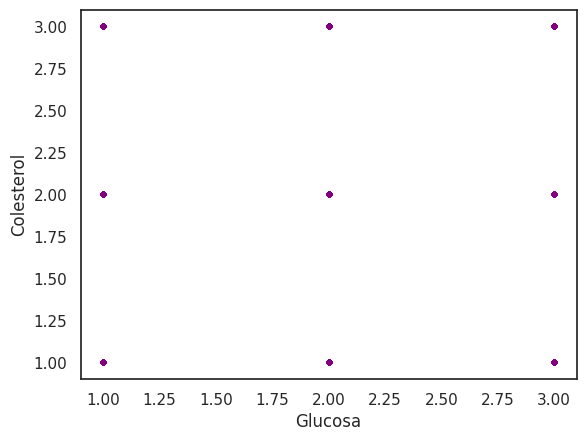

In [ ]:
#Vemos la relación entre el colesterol y la glucosa
plt.scatter(x= datos_numericos_filtrados['gluc'], y= datos_numericos_filtrados['cholesterol'], color='purple', s= 10, alpha=0.5)
plt.xlabel("Glucosa")
plt.ylabel("Colesterol")
plt.show()

Identificación de valores númericos y si contamos con valores nulos


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7000 non-null   int64  
 1   gender       7000 non-null   object 
 2   height       7000 non-null   int64  
 3   weight       7000 non-null   float64
 4   cholesterol  7000 non-null   int64  
 5   gluc         7000 non-null   int64  
 6   smoke        7000 non-null   bool   
 7   active       7000 non-null   bool   
 8   cardio       7000 non-null   bool   
dtypes: bool(3), float64(1), int64(4), object(1)
memory usage: 348.8+ KB


# 5. Distribuciones muestrales y técnicas de evaluación de modelos

Concepto de muestreo randomizado. Algoritmo de bootstrap. Gráficas de distribuciones muestrales

Las siguientes variables las utilizamos para hacer el muestro randomizado, las gráficas de distribuciones muestrales y trabajar con el algoritmo de bootstrap:

* ap_hi
* ap_lo
* peso
* glucosa
* colesterol

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Equipo 7/heart_data.csv', index_col=0)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
index,,,,,,,,,,,,,
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


vamos a tomar ap_hi

In [ ]:
df['ap_hi'].sample(n=20, replace=False)

index
10730    130
5871     120
39850    120
11136    160
18082    150
25589    110
35729    110
66967    120
20217    120
38882    140
35829    120
4248     140
49643    120
36251    125
19685    120
54992    130
40430    160
40550    100
66132    120
44062    100
Name: ap_hi, dtype: int64

In [ ]:

df['ap_hi'].sample(frac=0.1, replace=True)

index
38413    130
32386    110
43769    120
25456    150
48103    110
        ... 
58980    120
62044    110
62544    140
25513    100
49193    150
Name: ap_hi, Length: 7000, dtype: int64

In [ ]:
ap_hi = df['ap_hi']

means = []

for i in range(100_000):
    sample = ap_hi.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-28-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


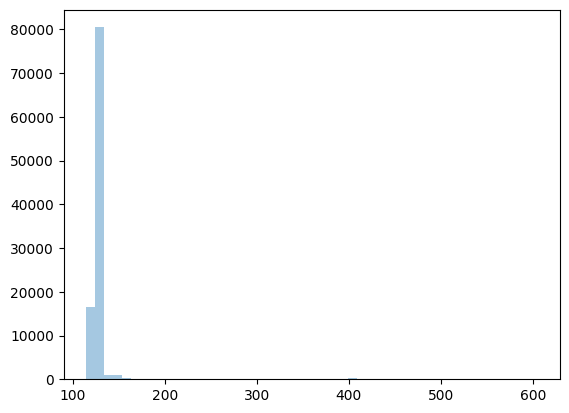

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

apl_lo

In [ ]:
df['ap_lo'].sample(n=20, replace=False)

index
19981      60
15943      90
32335      69
50778      80
37976      90
11795      80
10731    1000
14446      70
48377      90
69352      80
26937      80
61925      90
29827      80
6566       80
36321      70
24096      80
16092     120
38233      90
41240      80
61874      80
Name: ap_lo, dtype: int64

In [ ]:
df['ap_lo'].sample(frac=0.1, replace=True)

index
23965     90
67274     80
40895     70
37882    100
12114     90
        ... 
229       80
55361     79
40653     80
1667      80
42066     80
Name: ap_lo, Length: 7000, dtype: int64

In [ ]:
ap_lo = df['ap_lo']

means = []

for i in range(100_000):
    sample = ap_lo.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-33-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


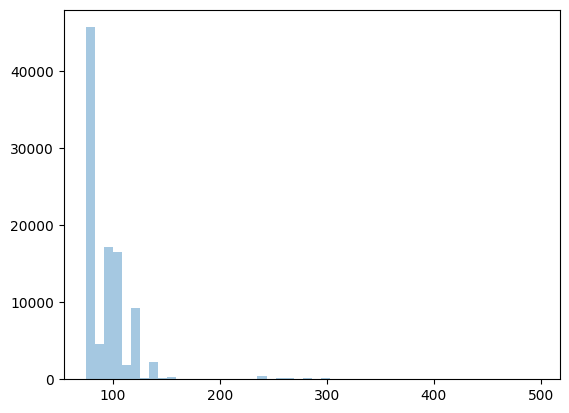

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

Weight

In [ ]:
df['weight'].sample(n=20, replace=False)

index
26314     60.0
31277     78.0
9409      69.0
12790    129.0
4133      76.0
11129     66.0
46677     62.0
52974     62.0
32436     60.0
35274     65.0
41645    103.0
69114     76.0
9590      68.0
41538     65.0
38524     83.0
62654     97.0
67364     73.0
36523     98.0
60210     71.0
27475     60.0
Name: weight, dtype: float64

In [ ]:

df['weight'].sample(frac=0.1, replace=True)

index
925       69.0
57707     78.0
63873     70.0
4585      91.0
21511     60.0
         ...  
51056    103.0
14385     60.0
38272     89.0
50251     71.0
47806     71.0
Name: weight, Length: 7000, dtype: float64

In [ ]:
weight = df['weight']

means = []

for i in range(100_000):
    sample = weight.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-37-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


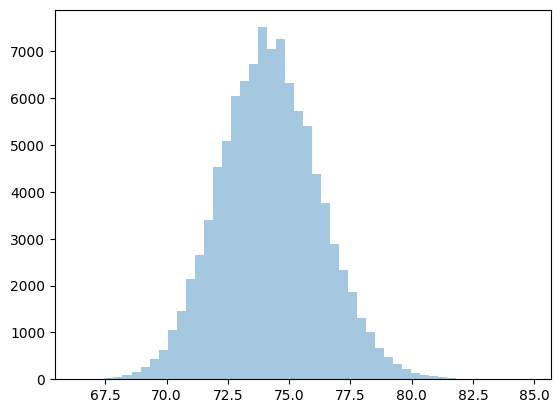

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

Glucosa

In [ ]:
df['gluc'].sample(n=20, replace=False)

index
46084    3
37411    1
21920    1
56898    1
16245    1
53832    3
66370    1
29257    1
34225    1
61846    1
27960    1
47105    1
26439    1
10702    2
16049    2
51919    2
54620    1
60969    1
52574    2
51784    1
Name: gluc, dtype: int64

In [ ]:
df['gluc'].sample(frac=0.1, replace=True)

index
1097     1
16501    1
51869    1
27109    1
56758    1
        ..
9021     1
22534    1
69958    1
40307    1
63046    1
Name: gluc, Length: 7000, dtype: int64

In [ ]:
gluc = df['gluc']

means = []

for i in range(100_000):
    sample = gluc.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-41-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


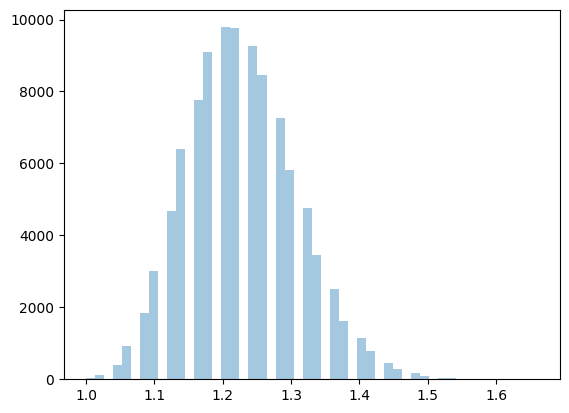

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

Cholesterol

In [ ]:
df['cholesterol'].sample(n=20, replace=False)

index
68645    2
34323    1
31378    2
35799    1
41215    3
13561    1
41532    2
64993    1
65344    1
3288     1
25838    1
69685    1
21307    1
18877    2
43801    1
25041    1
8014     1
9042     1
46431    2
43071    3
Name: cholesterol, dtype: int64

In [ ]:
df['cholesterol'].sample(frac=0.1, replace=True)

index
36282    3
18539    1
29445    1
63073    3
20700    1
        ..
32853    1
38947    3
64270    1
19753    1
9050     1
Name: cholesterol, Length: 7000, dtype: int64

In [ ]:
cholesterol = df['cholesterol']

means = []

for i in range(100_000):
    sample = cholesterol.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-45-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


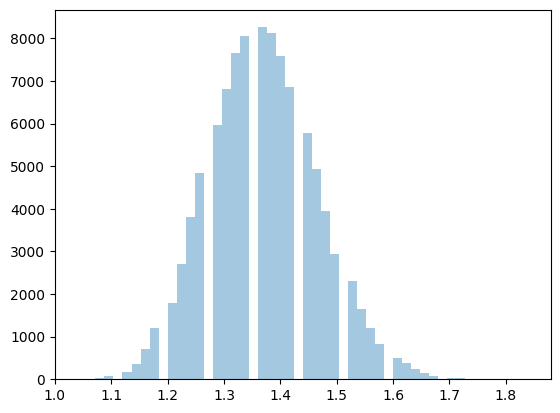

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

Error estándar.
Calculamos el error estándar de la glucosa.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Equipo 7/heart_data.csv', index_col=0)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
index,,,,,,,,,,,,,
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
gluc = df['gluc']

means = []

for i in range(100_000):
    sample = gluc.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 0.08108092730209567


In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 1.0
Valor máximo: 1.62
Rango: 0.6200000000000001


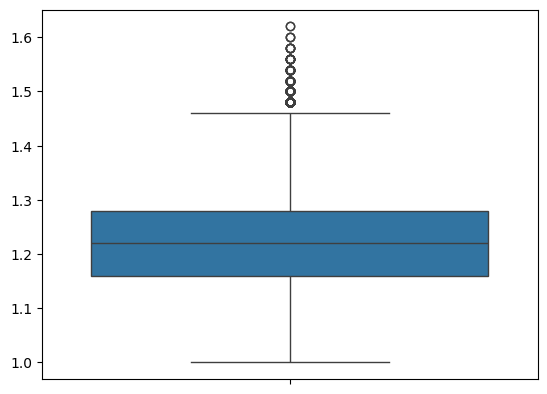

In [ ]:
sns.boxplot(serie_means);

Intervalo de confianza.
Como en el apartado anterior, obtuvimos el intervalo de confianza de la glucosa.

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de  confianza de la media: {limite_inferior} < {gluc.mean()} < {limite_superior}')

Intervalo de  confianza de la media: 1.08 < 1.226457142857143 < 1.4


In [ ]:
mean_of_intervals = ((gluc.mean() - limite_inferior) + (limite_superior - gluc.mean())) / 2

print(f'Intervalo de  confianza de la media: {gluc.mean()} +/- {mean_of_intervals}')

Intervalo de  confianza de la media: 1.226457142857143 +/- 0.15999999999999992


<ipython-input-60-5881df1d38d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


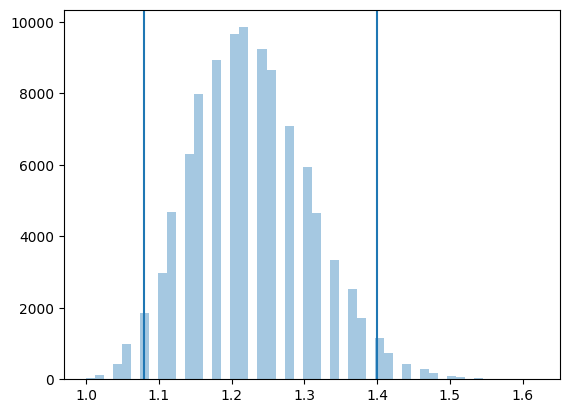

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

a) Modelo de regresión Linear Múltiple

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df.head(5)

,age,gender,height,weight,cholesterol,gluc,smoke,active,cardio
0,44,M,153,93.0,1,1,False,True,True
1,39,M,157,89.0,1,1,False,True,True
2,54,M,165,66.0,1,1,False,True,True
3,49,F,176,88.0,2,2,True,True,True
4,46,F,165,78.0,1,1,False,False,True


In [ ]:
df_sin_bool = df[['age', 'height', 'weight', 'cholesterol', 'gluc']]
df_sin_bool.head(5)

,age,height,weight,cholesterol,gluc
0,44,153,93.0,1,1
1,39,157,89.0,1,1
2,54,165,66.0,1,1
3,49,176,88.0,2,2
4,46,165,78.0,1,1


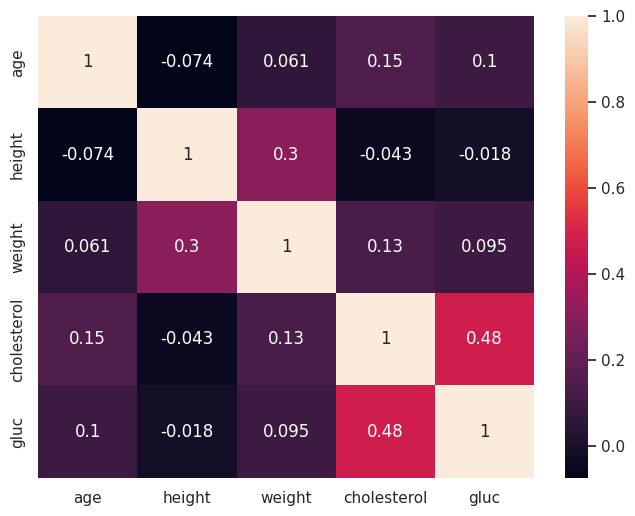

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_sin_bool.corr(), annot=True);

Parece que no exiten correlacioness fuerte, sin embargo, glucosa y coleterol son lor argumentos que mayor correlacion tienen. colesterol tienen una correlacion positiva con el peso, sin embargo, la correlacion positiva es mayor con los niveles de glucosa.

In [ ]:
X = df_sin_bool[['weight', 'gluc']]
y = df['cholesterol']
print(X)
print(y)

      weight  gluc
0       93.0     1
1       89.0     1
2       66.0     1
3       88.0     2
4       78.0     1
...      ...   ...
6995    62.0     1
6996    78.0     1
6997    67.0     1
6998    65.0     1
6999    70.0     1

[7000 rows x 2 columns]
0       1
1       1
2       1
3       2
4       1
       ..
6995    1
6996    1
6997    1
6998    1
6999    2
Name: cholesterol, Length: 7000, dtype: int64


In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.22144176463379894

In [ ]:
# Entrenando el modelo sin hacer la división de entrenamiento y prueba
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [ ]:
lr_2.score(X, y)

0.2357305662693363

El score es ligeramente mayor al realizar el modelo sin la división de entrenamiento y prueba, sin embargo, este cambio parece ser insignificante.

 b) Validación cruzada.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2')

In [ ]:
scores

{'fit_time': array([0.01229787, 0.00917578, 0.00412822, 0.00507903, 0.00498748]),
 'score_time': array([0.00268245, 0.00231981, 0.00202155, 0.00245976, 0.00228477]),
 'test_score': array([0.19513702, 0.24390308, 0.29603107, 0.24233286, 0.17607373])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.231 +/- 0.042


El modelo muestra un R² promedio de aproximadamente 0.231 con una desviación estándar de 0.042. Esto significa que el modelo de regresion multiole realizado, predice en el 23.% los niveles colesterol en relacion a el peso y los niveles de glucosa, con una variabilidad del 4.2%

## 6. Visualización de Datos Avanzada.

In [ ]:
#Imports:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Histogramas.
Para generar los hsitogramas utilizamos las siguientes variables:

* edad
* género
* altura
* peso
* smoke
* actividad física
* enfermadades cardiovasculares



Grupo Edad:

Text(0.5, 1.0, 'Histograma de Edades')

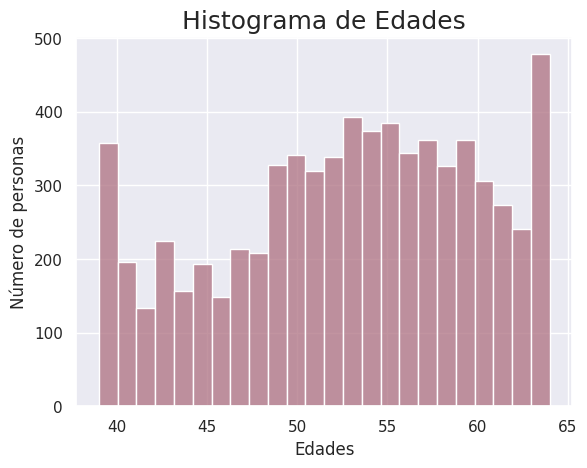

In [ ]:
#Histograma para categoría Edad:
Osns.set_style('darkgrid')
sns.histplot(df['age'], kde=False, stat="count", color='#ae7181')
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Edades', fontsize=18)

Comojkkkqq#### Grupo Género:

Text(0.5, 1.0, 'Histograma de Géneros')

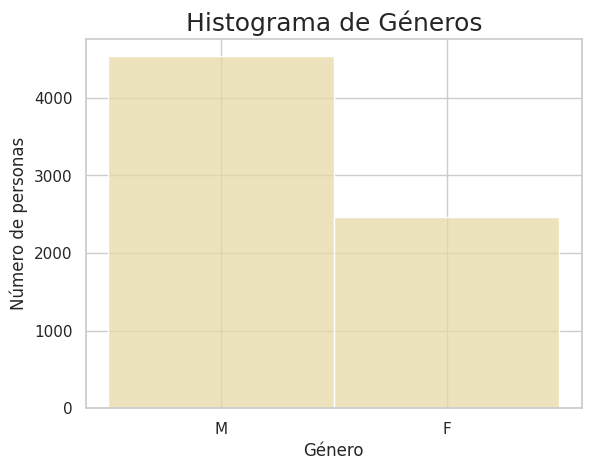

In [ ]:
#Histograma para categoría Género:
sns.set_style('whitegrid')
sns.histplot(df['gender'], kde=False, stat="count", color='#e6daa6')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Géneros', fontsize=18)

#### Grupo Altura:

Text(0.5, 1.0, 'Histograma de Alturas')

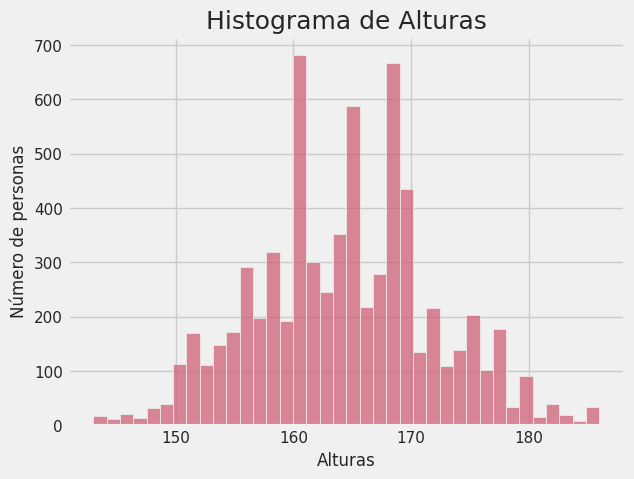

In [ ]:
#Histograma para categoría Altura:
plt.style.use('fivethirtyeight')
sns.histplot(df_height_filtrado['height'], kde=False, stat="count", color="#cf6275")
plt.xlabel('Alturas', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Alturas', fontsize=18)

#### Grupo Peso:

Text(0.5, 1.0, 'Histograma de Pesos')

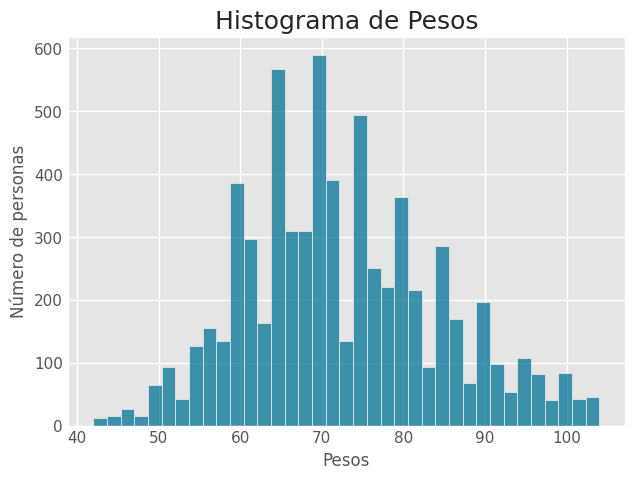

In [ ]:
#Histograma para categoría Peso:
plt.style.use('ggplot')
sns.histplot(df_weight_filtrado['weight'], kde=False, stat="count", color="#047495")
plt.xlabel('Pesos', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Pesos', fontsize=18)

#### Grupo Fumadores:

<ipython-input-153-8ea940955a5b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Fumadores', 'Fumadores'])


Text(0.5, 1.0, 'Histograma de Fumadores')

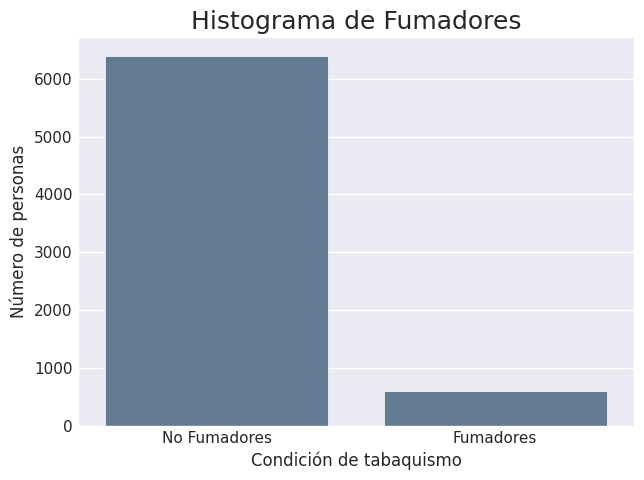

In [ ]:
#Histograma para categoría Fumadores:
sns.set_style('darkgrid')
ax = sns.countplot(x='smoke', data=df, color='#5b7c99')
ax.set_xticklabels(['No Fumadores', 'Fumadores'])
plt.xlabel('Condición de tabaquismo', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Fumadores', fontsize=18)

#### Grupo Actividad física:

<ipython-input-154-d2cf293d8f9e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No realizan actividad', 'Realizan actividad'])


Text(0.5, 1.0, 'Histograma de Actividad física')

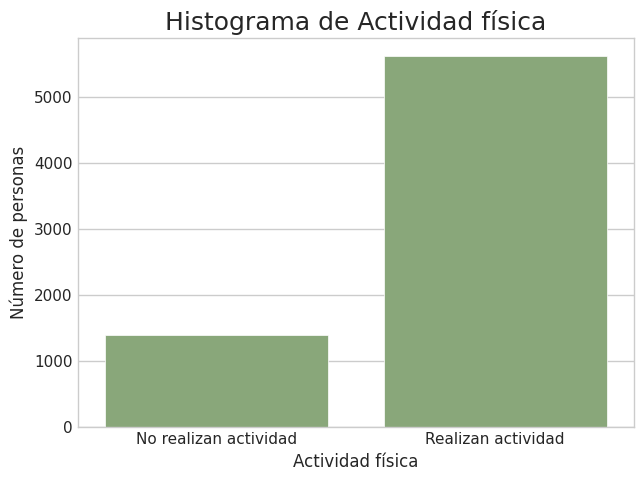

In [ ]:
#Histograma para categoría Actividad física:
sns.set_style('whitegrid')
ax = sns.countplot(x='active', data=df, color='#87ae73')
ax.set_xticklabels(['No realizan actividad', 'Realizan actividad'])
plt.xlabel('Actividad física', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Actividad física', fontsize=18)

#### Grupo Enfermedades cardiovasculares:

<ipython-input-155-133629bc0556>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No cuentan con enfermedades', 'Cuentan con enfermedad'])


Text(0.5, 1.0, 'Histograma de Enfermedades cardiovasculares')

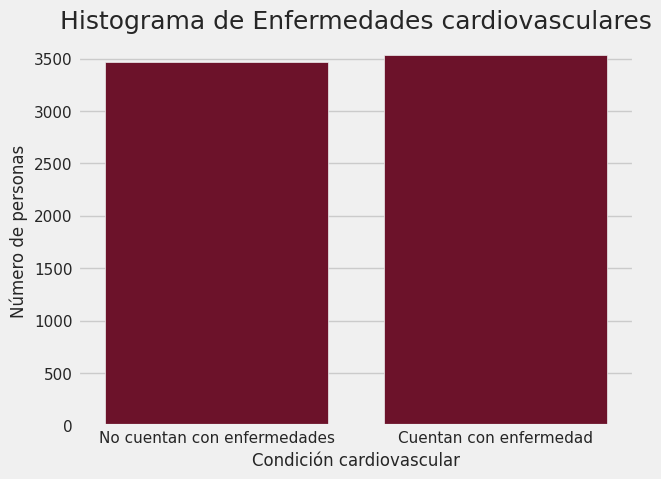

In [ ]:
#Histograma para categoría Enfermedades cardiovasculares:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='cardio', data=df, color='#7b0323')
ax.set_xticklabels(['No cuentan con enfermedades', 'Cuentan con enfermedad'])
plt.xlabel('Condición cardiovascular', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.title('Histograma de Enfermedades cardiovasculares', fontsize=18)

## Scatterplots por categorías:

#### Gráfico de dispersión de Altura vs. Peso por Género:

Text(0.5, 1.0, 'Gráfico de dispersión de Altura vs. Peso por Género')

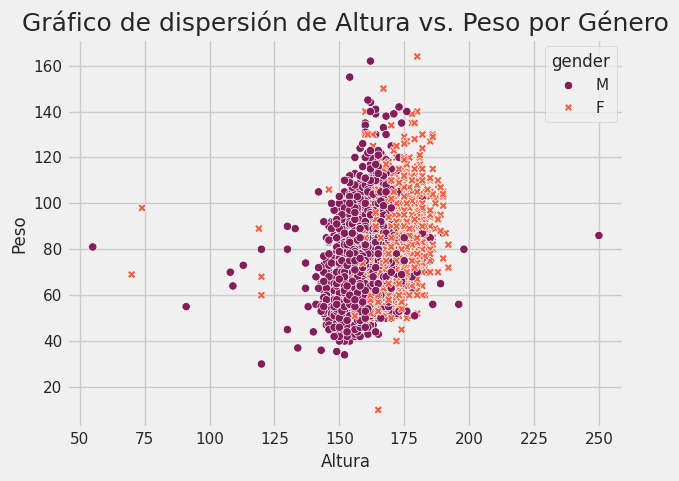

In [ ]:
sns.scatterplot(data=df, x='height', y='weight', hue=df['gender'],style=df['gender'], palette='rocket')
plt.xlabel('Altura', fontsize=12)
plt.ylabel('Peso', fontsize=12)
plt.title('Gráfico de dispersión de Altura vs. Peso por Género', fontsize=18)

#### Interpretación del gráfico:
La inclinación hacia la derecha sugiere una correlación positiva entre altura y peso, lo que significa que, en general, a medida que la altura aumenta, el peso también tiende a aumentar. La correlación positiva se observa en hombres y mujeres, pero no hay una diferencia notable en la magnitud de la relación entre géneros.

Por otro lado, observamos una muestra desbalanceada en términos de género.

<ipython-input-157-735b3195e31a>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='height', y='weight',hue=df['smoke'],style=df['gender'],palette=palette)


Text(0.5, 1.0, 'Gráfico de dispersión de Altura vs. Peso por Género y Personas fumadoras')

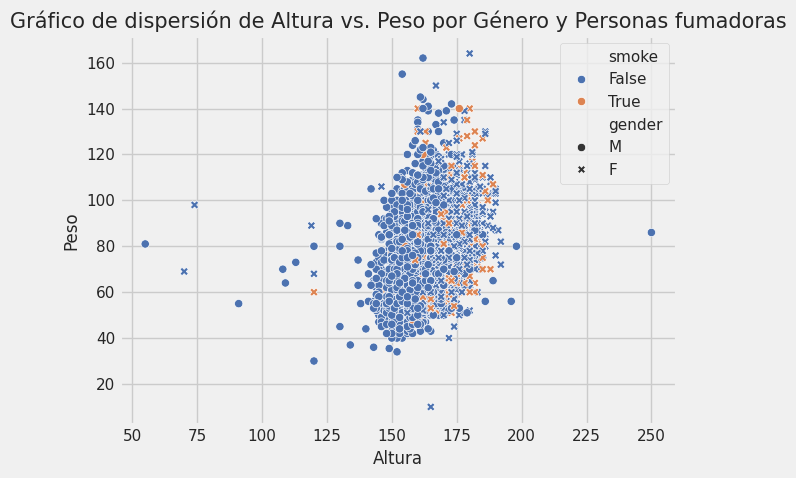

In [ ]:
palette = sns.color_palette("deep")
sns.scatterplot(data=df, x='height', y='weight',hue=df['smoke'],style=df['gender'],palette=palette)
plt.xlabel('Altura', fontsize=12)
plt.ylabel('Peso', fontsize=12)
plt.title('Gráfico de dispersión de Altura vs. Peso por Género y Personas fumadoras', fontsize=15)

#### Interpretación:
La información proporcionada sobre el hábito de fumar agrega un matiz interesante. Mayormente, las personas en el estudio no son fumadoras. Sin embargo, entre los fumadores, se destaca que la mayoría son mujeres, y específicamente, estas mujeres están registradas con alturas entre 1.50 y 1.80 metros y pesos entre 50 y 140 kg.

<ipython-input-158-aec6e98fdbb2>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='height', y='weight',hue=df['active'],style=df['gender'],palette=palette)


Text(0.5, 1.0, 'Gráfico de dispersión de Altura vs. Peso por Género y Actividad física')

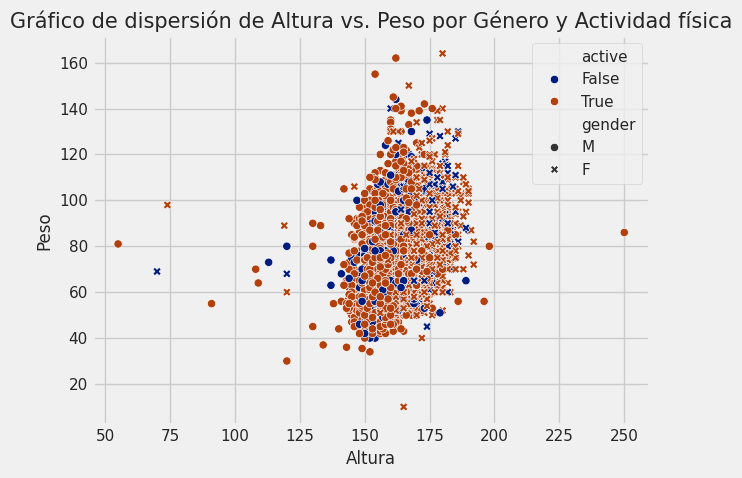

In [ ]:
palette = sns.color_palette("dark")
sns.scatterplot(data=df, x='height', y='weight',hue=df['active'],style=df['gender'],palette=palette)
plt.xlabel('Altura', fontsize=12)
plt.ylabel('Peso', fontsize=12)
plt.title('Gráfico de dispersión de Altura vs. Peso por Género y Actividad física', fontsize=15)

#### interpretación:
La mayoría de las personas en el estudio afirman realizar actividad física, aunque visualmente no se percibe una distinción clara entre la proporción de hombres y mujeres que participan en estas actividades. Esto sugiere que aproximadamente un 50% de hombres y un 50% de mujeres en la muestra están involucrados en actividades físicas, lo que destaca un equilibrio en este aspecto entre ambos géneros.

<ipython-input-159-efacb4ae3991>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='height', y='weight',hue=df['cardio'],style=df['gender'],palette=palette)


Text(0.5, 1.0, 'Gráfico de dispersión de Altura vs. Peso por Género y Enfermedades cardiovasculares')

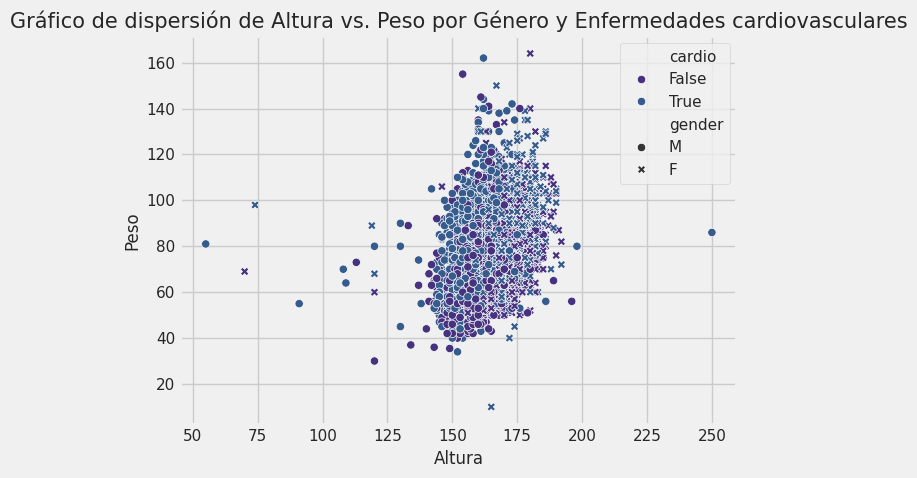

In [ ]:
palette = sns.color_palette("viridis")
sns.scatterplot(data=df, x='height', y='weight',hue=df['cardio'],style=df['gender'],palette=palette)
plt.xlabel('Altura', fontsize=12)
plt.ylabel('Peso', fontsize=12)
plt.title('Gráfico de dispersión de Altura vs. Peso por Género y Enfermedades cardiovasculares', fontsize=15)

#### Interpretación:
En la gráfica, se observa un equilibrio entre las personas que reportan tener y no tener enfermedades cardiovasculares, así como un balance entre ambos géneros en este aspecto. Esto indica que la presencia de enfermedades cardiovasculares no parece tener una inclinación significativa hacia un género en particular y que existe una distribución equitativa en la muestra en cuanto a la presencia de estas enfermedades.

Binning hexagonal:

Text(0.5, 1.0, 'Relación entre Altura y Peso')

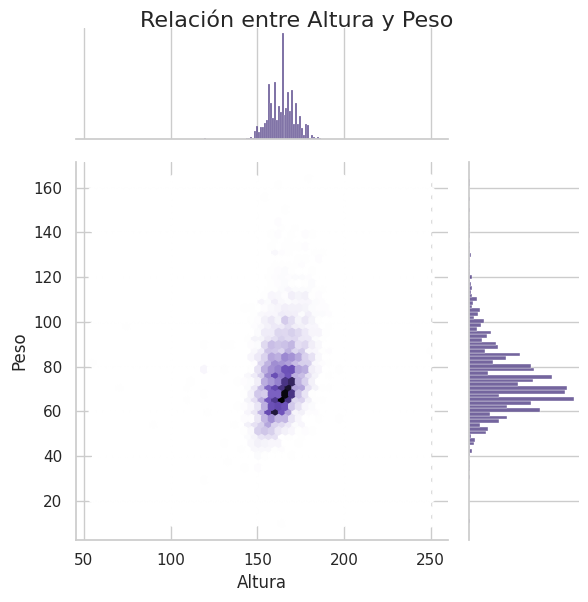

In [ ]:
sns.set_theme(style="whitegrid", palette="viridis")
plot = sns.jointplot(x='height', y='weight', data=df, kind='hex', ratio=3, joint_kws={'gridsize': 50});
plot.set_axis_labels('Altura', 'Peso', fontsize=12)
plot.fig.suptitle('Relación entre Altura y Peso', y=1.0, fontsize=16)

#### Interpretación:

La combinación de la información de Altura y Peso en el gráfico de binning hexagonal permite identificar áreas específicas en las que tanto la altura como el peso son más comunes o densos. La oscuridad de los hexágonos en la región entre 1.60 y 1.80 m de altura y entre 60 y 80 kg de peso sugiere que hay una concentración particular de personas con esas características en la muestra.

Barras apiladas:

Clasificación de niveles de colesterol por género:

In [ ]:
cholesterol_counts = df['cholesterol'].value_counts()
cholesterol_counts

1    5248
2     921
3     831
Name: cholesterol, dtype: int64

<ipython-input-162-064a016fecb0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts, ax=ax, palette='Blues', width = 0.15);


Text(0.5, 1.0, 'Conteo de frecuencia de Nivel de Colesterol')

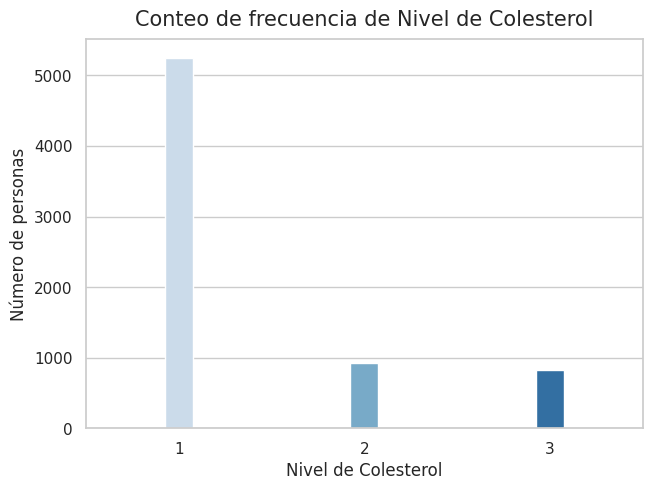

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts, ax=ax, palette='Blues', width = 0.15);

ax.set_ylabel('Número de personas',fontsize=12)
ax.set_xlabel('Nivel de Colesterol',fontsize=12)
ax.set_title('Conteo de frecuencia de Nivel de Colesterol', fontsize=15, pad=10)

In [ ]:
df['count'] = 1

In [ ]:
value_counts_cholesterol = df.groupby(['cholesterol', 'gender'])['count'].sum()

value_counts_cholesterol

cholesterol  gender
1            F         1870
             M         3378
2            F          327
             M          594
3            F          267
             M          564
Name: count, dtype: int64

In [ ]:
value_counts_cholesterol = value_counts_cholesterol.unstack(1)

value_counts_cholesterol

gender,F,M
cholesterol,,
1,1870,3378
2,327,594
3,267,564


In [ ]:
value_counts_cholesterol = value_counts_cholesterol.fillna(0)

<ipython-input-167-1366dced11d9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Nivel de Colesterol')

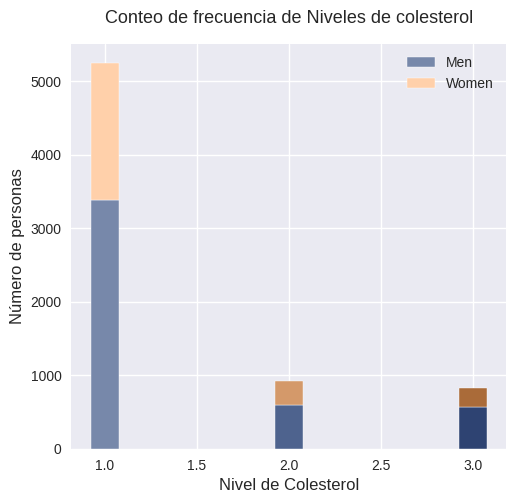

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts_cholesterol.index, value_counts_cholesterol['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"], width = 0.15)
plt2 = ax.bar(value_counts_cholesterol.index, value_counts_cholesterol['F'], bottom=value_counts_cholesterol['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"], width = 0.15)

ax.set_title('Conteo de frecuencia de Niveles de colesterol', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylabel('Número de personas',fontsize=12)
ax.set_xlabel('Nivel de Colesterol',fontsize=12)

#### Interpretación:
Según la representación visual proporcionada por la gráfica de barras apiladas, se evidencia la distribución de niveles de colesterol segmentados por género. Cada barra representa un nivel específico de colesterol, siendo el nivel 1 asociado a valores normales y el nivel 3 a niveles altos. Observando que la mayoría de los registros se sitúan en el rango de niveles saludables. Sin embargo, es relevante destacar que, dentro de este grupo, la predominancia se inclina hacia los hombres, indicando que en este punto específico, son ellos quienes muestran una mayor frecuencia en los niveles de colesterol normales.

Clasificación de niveles de glucosa por género:

In [ ]:
gluc_counts = df['gluc'].value_counts()
gluc_counts

1    5965
2     529
3     506
Name: gluc, dtype: int64

In [ ]:
df['count'] = 1
value_counts_gluc = df.groupby(['gluc', 'gender'])['count'].sum()

value_counts_gluc

gluc  gender
1     F         2111
      M         3854
2     F          188
      M          341
3     F          165
      M          341
Name: count, dtype: int64

In [ ]:
value_counts_gluc = value_counts_gluc.unstack(1)
value_counts_gluc = value_counts_gluc.fillna(0)

value_counts_gluc

gender,F,M
gluc,,
1,2111,3854
2,188,341
3,165,341


<ipython-input-171-5dbc19cfda7a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Nivel de Glucosa')

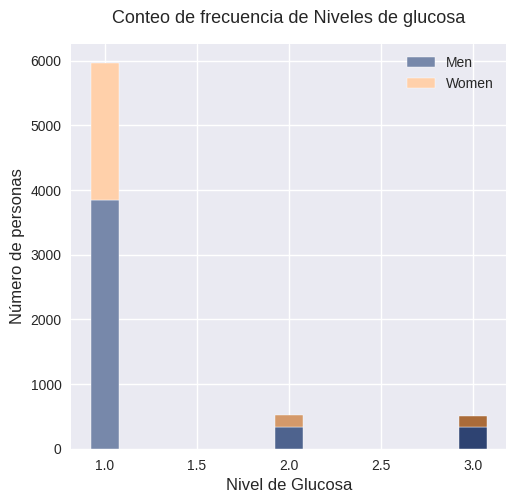

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts_gluc.index, value_counts_gluc['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"], width = 0.15)
plt2 = ax.bar(value_counts_gluc.index, value_counts_gluc['F'], bottom=value_counts_gluc['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"], width = 0.15)

ax.set_title('Conteo de frecuencia de Niveles de glucosa', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylabel('Número de personas',fontsize=12)
ax.set_xlabel('Nivel de Glucosa',fontsize=12)

#### Interpretación:
En la representación de la frecuencia de niveles de glucosa, se repite el patrón observado previamente. En este contexto, el nivel 1.0 corresponde a niveles estables de glucosa, mientras que el nivel 3.0 representa niveles elevados. Una vez más, se observa una mayor concentración de registros en el nivel 1, indicando predominantemente niveles estables de glucosa en la población estudiada. Cabe resaltar que, de manera consistente con la tendencia anterior, los hombres se destacan como el grupo con mayor representación en niveles saludables de glucosa.

Clasificación de fumadores por género:

In [ ]:
smoke_counts = df['smoke'].value_counts()
smoke_counts

False    6394
True      606
Name: smoke, dtype: int64

In [ ]:
df['count'] = 1
value_counts_smoke = df.groupby(['smoke', 'gender'])['count'].sum()

value_counts_smoke

smoke  gender
False  F         1944
       M         4450
True   F          520
       M           86
Name: count, dtype: int64

In [ ]:
value_counts_smoke = value_counts_smoke.unstack(1)
value_counts_smoke = value_counts_smoke.fillna(0)

value_counts_smoke

gender,F,M
smoke,,
False,1944,4450
True,520,86


<ipython-input-175-476f84858bbf>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Condición de tabaquismo')

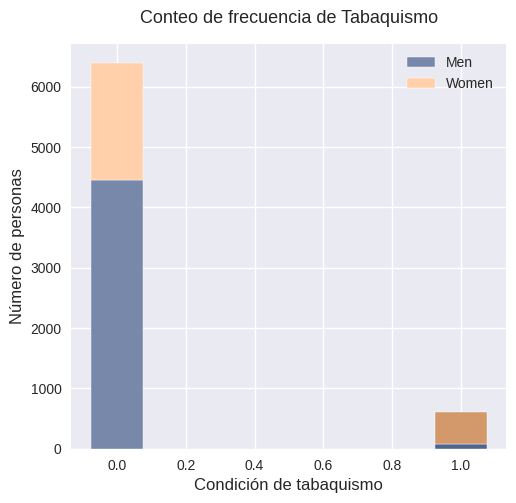

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts_smoke.index, value_counts_smoke['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"], width = 0.15)
plt2 = ax.bar(value_counts_smoke.index, value_counts_smoke['F'], bottom=value_counts_smoke['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"], width = 0.15)

ax.set_title('Conteo de frecuencia de Tabaquismo', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylabel('Número de personas',fontsize=12)
ax.set_xlabel('Condición de tabaquismo',fontsize=12)

#### Interpretación:

En la gráfica de barras apiladas que representa la segmentación entre la población que consume tabaco y la que no, donde 0 indica "No consume" y 1 indica "Consume", se destaca que la mayoría de los registros corresponden a individuos no fumadores. Se evidencia nuevamente una predominancia de hombres entre los no fumadores. Sin embargo, a pesar de constituir una proporción menor de los registros totales, la mayoría de las personas que consumen tabaco son mujeres, aunque este grupo en particular se sitúe por debajo de los 1000 registros. Esta diferencia resalta la relevancia de examinar no únicamente la frecuencia general de patrones de consumo, sino también las diferencias de género presentes en estas clasificaciones.

Clasificación de actividad física por género:

In [ ]:
active_counts = df['active'].value_counts()
active_counts

True     5616
False    1384
Name: active, dtype: int64

In [ ]:
df['count'] = 1
value_counts_active = df.groupby(['active', 'gender'])['count'].sum()

value_counts_active

active  gender
False   F          469
        M          915
True    F         1995
        M         3621
Name: count, dtype: int64

In [ ]:
value_counts_active = value_counts_active.unstack(1)
value_counts_active = value_counts_active.fillna(0)

value_counts_active

gender,F,M
active,,
False,469,915
True,1995,3621


<ipython-input-179-a46655fd19ae>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Actividad física')

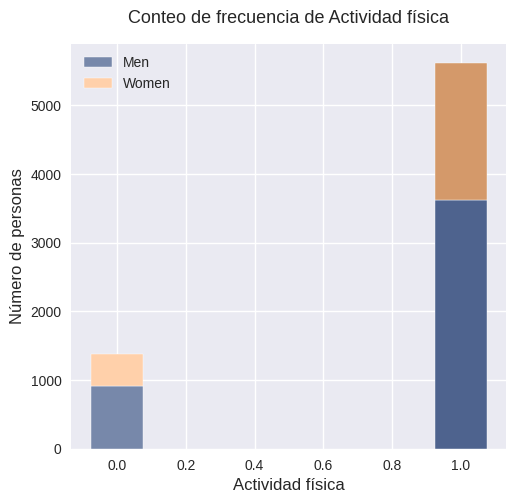

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts_active.index, value_counts_active['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"], width = 0.15)
plt2 = ax.bar(value_counts_active.index, value_counts_active['F'], bottom=value_counts_active['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"], width = 0.15)

ax.set_title('Conteo de frecuencia de Actividad física', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylabel('Número de personas',fontsize=12)
ax.set_xlabel('Actividad física',fontsize=12)

#### Interpretación:
Se presenta una representación de los individuos que participan en actividades físicas, donde se destaca un número significativamente mayor de personas que están involucradas en este tipo de actividades. Los valores booleanos, que se traducen como "sí actividad" y "no actividad", muestran una clara disparidad entre hombres y mujeres, subrayando las diferencias notables en la participación en actividades físicas entre ambos géneros.

Clasificación de condición cardiovascular por género:

In [ ]:
cardio_counts = df['cardio'].value_counts()
cardio_counts

True     3532
False    3468
Name: cardio, dtype: int64

In [ ]:
df['count'] = 1
value_counts_cardio = df.groupby(['cardio', 'gender'])['count'].sum()

value_counts_cardio

cardio  gender
False   F         1170
        M         2298
True    F         1294
        M         2238
Name: count, dtype: int64

In [ ]:
value_counts_cardio = value_counts_cardio.unstack(1)
value_counts_cardio = value_counts_cardio.fillna(0)

value_counts_cardio

gender,F,M
cardio,,
False,1170,2298
True,1294,2238


<ipython-input-183-594fe1573d1a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Condición cardiovascular')

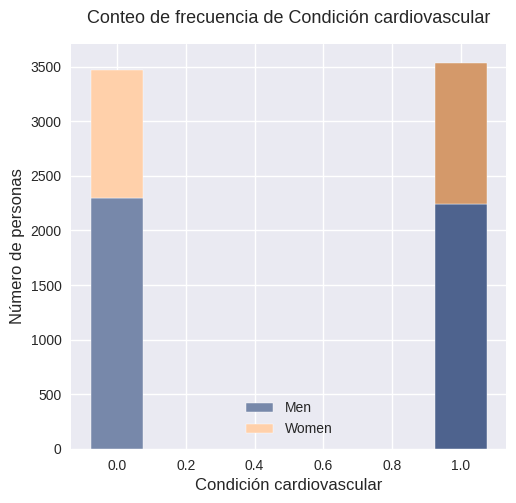

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts_cardio.index, value_counts_cardio['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"], width = 0.15)
plt2 = ax.bar(value_counts_cardio.index, value_counts_cardio['F'], bottom=value_counts_cardio['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"], width = 0.15)

ax.set_title('Conteo de frecuencia de Condición cardiovascular', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylabel('Número de personas',fontsize=12)
ax.set_xlabel('Condición cardiovascular',fontsize=12)

#### Interpretación:

Finalmente, en el análisis del conteo de frecuencias de las condiciones cardiovasculares en los registros, se destaca un equilibrio significativo entre aquellos que tienen y no tienen estas enfermedades. Con más de 3500 registros, superan las personas con estas enfermedades. Además, se observa una prevalencia de hombres sobre mujeres en ambas categorías.

# C. Continuación del proyecto

Hasta ahora concretamos el objetivo de analizar los datos. Nuestro siguiente paso será corregir el modelo de Regresión Lineal y aplicar los aprandizajes del Módulo Machine Learning.
